In [1]:
library(tidyverse)

list.files(path = "C:/Users/ANIKET/Documents/RLab/Dataset/")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


[1] "CA_category_id.json" "CAvideos.csv"        "DE_category_id.json"
 [4] "DEvideos.csv"        "FR_category_id.json" "FRvideos.csv"       
 [7] "GB_category_id.json" "GBvideos.csv"        "IN_category_id.json"
[10] "INvideos.csv"        "JP_category_id.json" "JPvideos.csv"       
[13] "KR_category_id.json" "KRvideos.csv"        "MX_category_id.json"
[16] "MXvideos.csv"        "RU_category_id.json" "RUvideos.csv"       
[19] "US_category_id.json" "USvideos.csv"

In [2]:
# Data manipulation
library(data.table)
library(dplyr)
library(DT)

# Time manipulation
library(lubridate)

# Visualization
library(ggplot2)
library(ggcorrplot)
library(plotrix)
library(corrplot)
library(ggdendro)
library(ggrepel)

# Text manipulation
library(tidytext)
library(stringr)
library(tm)
library(sentimentr)
library(wordcloud)

# Extra
library(tidyr)
library(scales)
library(R.utils)
library(repr)

# set a default plot size
options(repr.plot.width=16, repr.plot.height = 16)


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date

Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Warning message:
"package 'plotrix' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'ggdendro' was built under R version 3.6.3"Warning message:
"package 'ggrepel' was built under R version 3.6.3"Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Warning message:
"package 'sentimentr' was built under R version 3.6.3"Warning m

In [3]:
no_lines_ca <- countLines("C:/Users/ANIKET/Documents/RLab/Dataset/CAvideos.csv")
no_lines_de <- countLines("Dataset/DEvideos.csv")
no_lines_fr <- countLines("Dataset/FRvideos.csv")
no_lines_gb <- countLines("Dataset/GBvideos.csv")
no_lines_in <- countLines("Dataset/INvideos.csv")
no_lines_jp <- countLines("Dataset/JPvideos.csv")
no_lines_kr <- countLines("Dataset/KRvideos.csv")
no_lines_mx <- countLines("Dataset/MXvideos.csv")
no_lines_ru <- countLines("Dataset/RUvideos.csv")
no_lines_us <- countLines("Dataset/USvideos.csv")

df_ca <- tail(fread("Dataset/CAvideos.csv", encoding = "UTF-8"), no_lines_ca)
df_de <- tail(fread("Dataset/DEvideos.csv", encoding = "UTF-8"), no_lines_de)
df_fr <- tail(fread("Dataset/FRvideos.csv", encoding = "UTF-8"), no_lines_fr)
df_gb <- tail(fread("Dataset/GBvideos.csv", encoding = "UTF-8"), no_lines_gb)
df_in <- tail(fread("Dataset/INvideos.csv", encoding = "UTF-8"), no_lines_in)
df_jp <- tail(fread("Dataset/JPvideos.csv", encoding = "UTF-8"), no_lines_jp)
df_kr <- tail(fread("Dataset/KRvideos.csv", encoding = "UTF-8"), no_lines_kr)
df_mx <- tail(fread("Dataset/MXvideos.csv", encoding = "UTF-8"), no_lines_mx)
df_ru <- tail(fread("Dataset/RUvideos.csv", encoding = "UTF-8"), no_lines_ru)
df_us <- tail(fread("Dataset/USvideos.csv", encoding = "UTF-8"), no_lines_us)

Warning message in fread("Dataset/CAvideos.csv", encoding = "UTF-8"):
"Found and resolved improper quoting in first 100 rows. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning."Warning message in fread("Dataset/CAvideos.csv", encoding = "UTF-8"):
"Stopped early on line 201. Expected 16 fields but found 17. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<IF4Cbb_82l0,17.14.11,"Ð’Ð¾ÑÐºÑ€ÐµÑÐ½Ñ‹Ð¹ Ð²ÐµÑ‡ÐµÑ€ Ñ Ð’Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ€Ð¾Ð¼ Ð¡Ð¾Ð»Ð¾Ð²ÑŒÐµÐ²Ñ‹Ð¼ Ð¾Ñ‚ 12.11.2017","Ð Ð¾ÑÑÐ¸Ñ 24",24,2017-11-12T22:21:28.000Z,"Ð¿Ð¾ÐµÐ´Ð¸Ð½Ð¾Ðº"|"Ð¼Ð¸Ñ…ÐµÐµÐ²"|"Ð¿Ð¾Ð»Ð½Ñ‹Ð¹ ÐºÐ¾Ð½Ñ‚Ð°ÐºÑ‚"|"Ð²ÐµÑ‡ÐµÑ€ Ñ Ð²Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ€Ð¾Ð¼ ÑÐ¾Ð»Ð¾Ð²ÑŒÐµÐ²Ñ‹Ð¼"|"ÐºÐ¾Ð²Ñ‚ÑƒÐ½"|"Ð¶Ð¸Ñ€Ð¸Ð½Ð¾Ð²ÑÐºÐ¸Ð¹"|"ÑÐ°Ñ‚Ð°Ð½Ð¾Ð²ÑÐºÐ¸Ð¹"|"ÑÐ¾Ð»Ð¾Ð²ÑŒÐµÐ²"|"Ð²ÐµÑ‡ÐµÑ€"|"Ð²Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ€ ÑÐ¾Ð»Ð¾Ð²ÑŒÐµÐ²",318474,1857,2450,1165,https://i.ytimg.com/vi/IF4Cbb_82l0/default.jpg,False,False,Fa>>"Warning message in fread("Dataset/DEvideos.csv

In [4]:
# add additional column "Country" to each data set
df_ca$country <- c("Canada")
df_de$country <- c("Germany")
df_fr$country <- c("France")
df_gb$country <- c("Great Britain")
df_in$country <- c("India")
df_jp$country <- c("Japan")
df_kr$country <- c("South Korea")
df_mx$country <- c("Mexico")
df_ru$country <- c("Russia")
df_us$country <- c("USA")

df_all <- as.data.table(rbind(df_ca, df_de, df_fr, df_gb, df_in, df_jp, df_kr, df_mx, df_ru, df_us))

# extract "hour" information from "publish_time" column to use it later to create a time of day graph.
df_all$hour <- format(strptime(df_all$publish_time, "%Y-%m-%d %H:%M:%S"), "%H")

# create a new column for labeling time of day such as Prime Time etc. 
df_all <- df_all %>% 
  mutate(
    dayparting_name = case_when(
      .$hour == "00" ~ "Late Fringe: 0 - 1", 
      .$hour == "01" ~ "Post Late Fringe: 1 - 2",
      .$hour == "02" | .$hour == "03" | .$hour == "04" | .$hour == "05" ~ "Night Time: 2 - 6",
      .$hour == "06" | .$hour == "07" | .$hour == "08" | .$hour == "09" ~ "Early Morning: 6 - 10",
      .$hour == "10" | .$hour == "11" | .$hour == "12" | .$hour == "13" | .$hour == "14" | .$hour == "15" ~ "Day Time: 10 - 16", 
      .$hour == "16" | .$hour == "17" | .$hour == "18" ~ "Early Fringe: 16 - 19",
      .$hour == "19" ~ "Prime Access: 19 - 20",
      .$hour == "20" | .$hour == "21" | .$hour == "22" ~ "Prime Time: 20 - 23",
      .$hour == "23" ~ "Late News: 23 - 0",
      TRUE ~ "Other"
    )
  )

# reorder columns
col_order <- c("video_id", "trending_date", "title", "channel_title", "category_id", "publish_time", "hour", "dayparting_name",
                "tags", "views", "likes", "dislikes", "comment_count", "thumbnail_link", "comments_disabled", 
                "ratings_disabled", "video_error_or_removed", "description", "country" )

df_all <- df_all[, col_order]




head(df_all)

video_id    trending_date
1 n1WpP7iowLc 17.14.11     
2 0dBIkQ4Mz1M 17.14.11     
3 5qpjK5DgCt4 17.14.11     
4 d380meD0W0M 17.14.11     
5 2Vv-BfVoq4g 17.14.11     
6 0yIWz1XEeyc 17.14.11     
  title                                                                                        
1 Eminem - Walk On Water (Audio) ft. Beyoncé                                                   
2 PLUSH - Bad Unboxing Fan Mail                                                                
3 Racist Superman | Rudy Mancuso, King Bach & Lele Pons                                        
4 I Dare You: GOING BALD!?                                                                     
5 Ed Sheeran - Perfect (Official Music Video)                                                  
6 Jake Paul Says Alissa Violet CHEATED with LOGAN PAUL! #DramaAlert Team 10 vs  Martinez Twins!
  channel_title category_id publish_time             hour dayparting_name
1 EminemVEVO    10          2017-11-10T17:00:03.000Z NA   Other          
2 iDubbbzTV     23          2017-11-13T17:00:00.000Z NA   Other          
3 Rudy Mancuso  23          2017-11-12T19:05:24.000Z NA   Other          
4 nigahiga      24          2017-11-12T18:01:41.000Z NA   Other          
5 Ed Sheeran    10          2017-11-09T11:04:14.000Z NA   Other          
6 DramaAlert    25          2017-11-13T07:37:51.000Z NA   Other          
  tags                                                                                                                                                                                                                                                                                                                      
1 Eminem"|"Walk"|"On"|"Water"|"Aftermath/Shady/Interscope"|"Rap                                                                                                                                                                                                                                                             
2 plush"|"bad unboxing"|"unboxing"|"fan mail"|"idubbbztv"|"idubbbztv2"|"things"|"best"|"packages"|"plushies"|"chontent chop                                                                                                                                                                                                 
3 racist superman"|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver's License | Lele Pons
4 ryan"|"higa"|"higatv"|"nigahiga"|"i dare you"|"idy"|"rhpc"|"dares"|"no truth"|"comments"|"comedy"|"funny"|"stupid"|"fail                                                                                                                                                                                                  
5 edsheeran"|"ed sheeran"|"acoustic"|"live"|"cover"|"official"|"remix"|"official video"|"lyrics"|"session                                                                                                                                                                                                                   
6 #DramaAlert"|"Drama"|"Alert"|"DramaAlert"|"keemstar"|"youtube news"|"jake paul"|"team 10"|"alissa violet"|"cheated"|"logan paul"|"logan paul alissa violet"|"jake paul alissa violet"|"Martinez Twins"|"left team 10"|"faze banks"|"erika costell                                                                         
  views    likes   dislikes comment_count
1 17158579  787425 43420    125882       
2  1014651  127794  1688     13030       
3  3191434  146035  5339      8181       
4  2095828  132239  1989     17518       
5 33523622 1634130 21082     85067       
6  1309699  103755  4613     12143       
  thumbnail_link                                 comments_disabled
1 https://i.ytimg.com/vi/n1WpP7iowLc

In [5]:
str(df_all)

'data.frame':	206409 obs. of  19 variables:
 $ video_id              : chr  "n1WpP7iowLc" "0dBIkQ4Mz1M" "5qpjK5DgCt4" "d380meD0W0M" ...
 $ trending_date         : chr  "17.14.11" "17.14.11" "17.14.11" "17.14.11" ...
 $ title                 : chr  "Eminem - Walk On Water (Audio) ft. Beyoncé" "PLUSH - Bad Unboxing Fan Mail" "Racist Superman | Rudy Mancuso, King Bach & Lele Pons" "I Dare You: GOING BALD!?" ...
 $ channel_title         : chr  "EminemVEVO" "iDubbbzTV" "Rudy Mancuso" "nigahiga" ...
 $ category_id           : int  10 23 23 24 10 25 23 22 24 22 ...
 $ publish_time          : chr  "2017-11-10T17:00:03.000Z" "2017-11-13T17:00:00.000Z" "2017-11-12T19:05:24.000Z" "2017-11-12T18:01:41.000Z" ...
 $ hour                  : chr  NA NA NA NA ...
 $ dayparting_name       : chr  "Other" "Other" "Other" "Other" ...
 $ tags                  : chr  "Eminem\"|\"Walk\"|\"On\"|\"Water\"|\"Aftermath/Shady/Interscope\"|\"Rap" "plush\"|\"bad unboxing\"|\"unboxing\"|\"fan mail\"|\"idubbbztv\"|\"i

In [6]:
summary(df_all)

   video_id         trending_date         title           channel_title     
 Length:206409      Length:206409      Length:206409      Length:206409     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  category_id    publish_time           hour           dayparting_name   
 Min.   : 1.00   Length:206409      Length:206409      Length:206409     
 1st Qu.:20.00   Class :character   Class :character   Class :character  
 Median :24.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :20.72                                                           
 3rd Qu.:24.00                                                           
 Max.   :44.00   

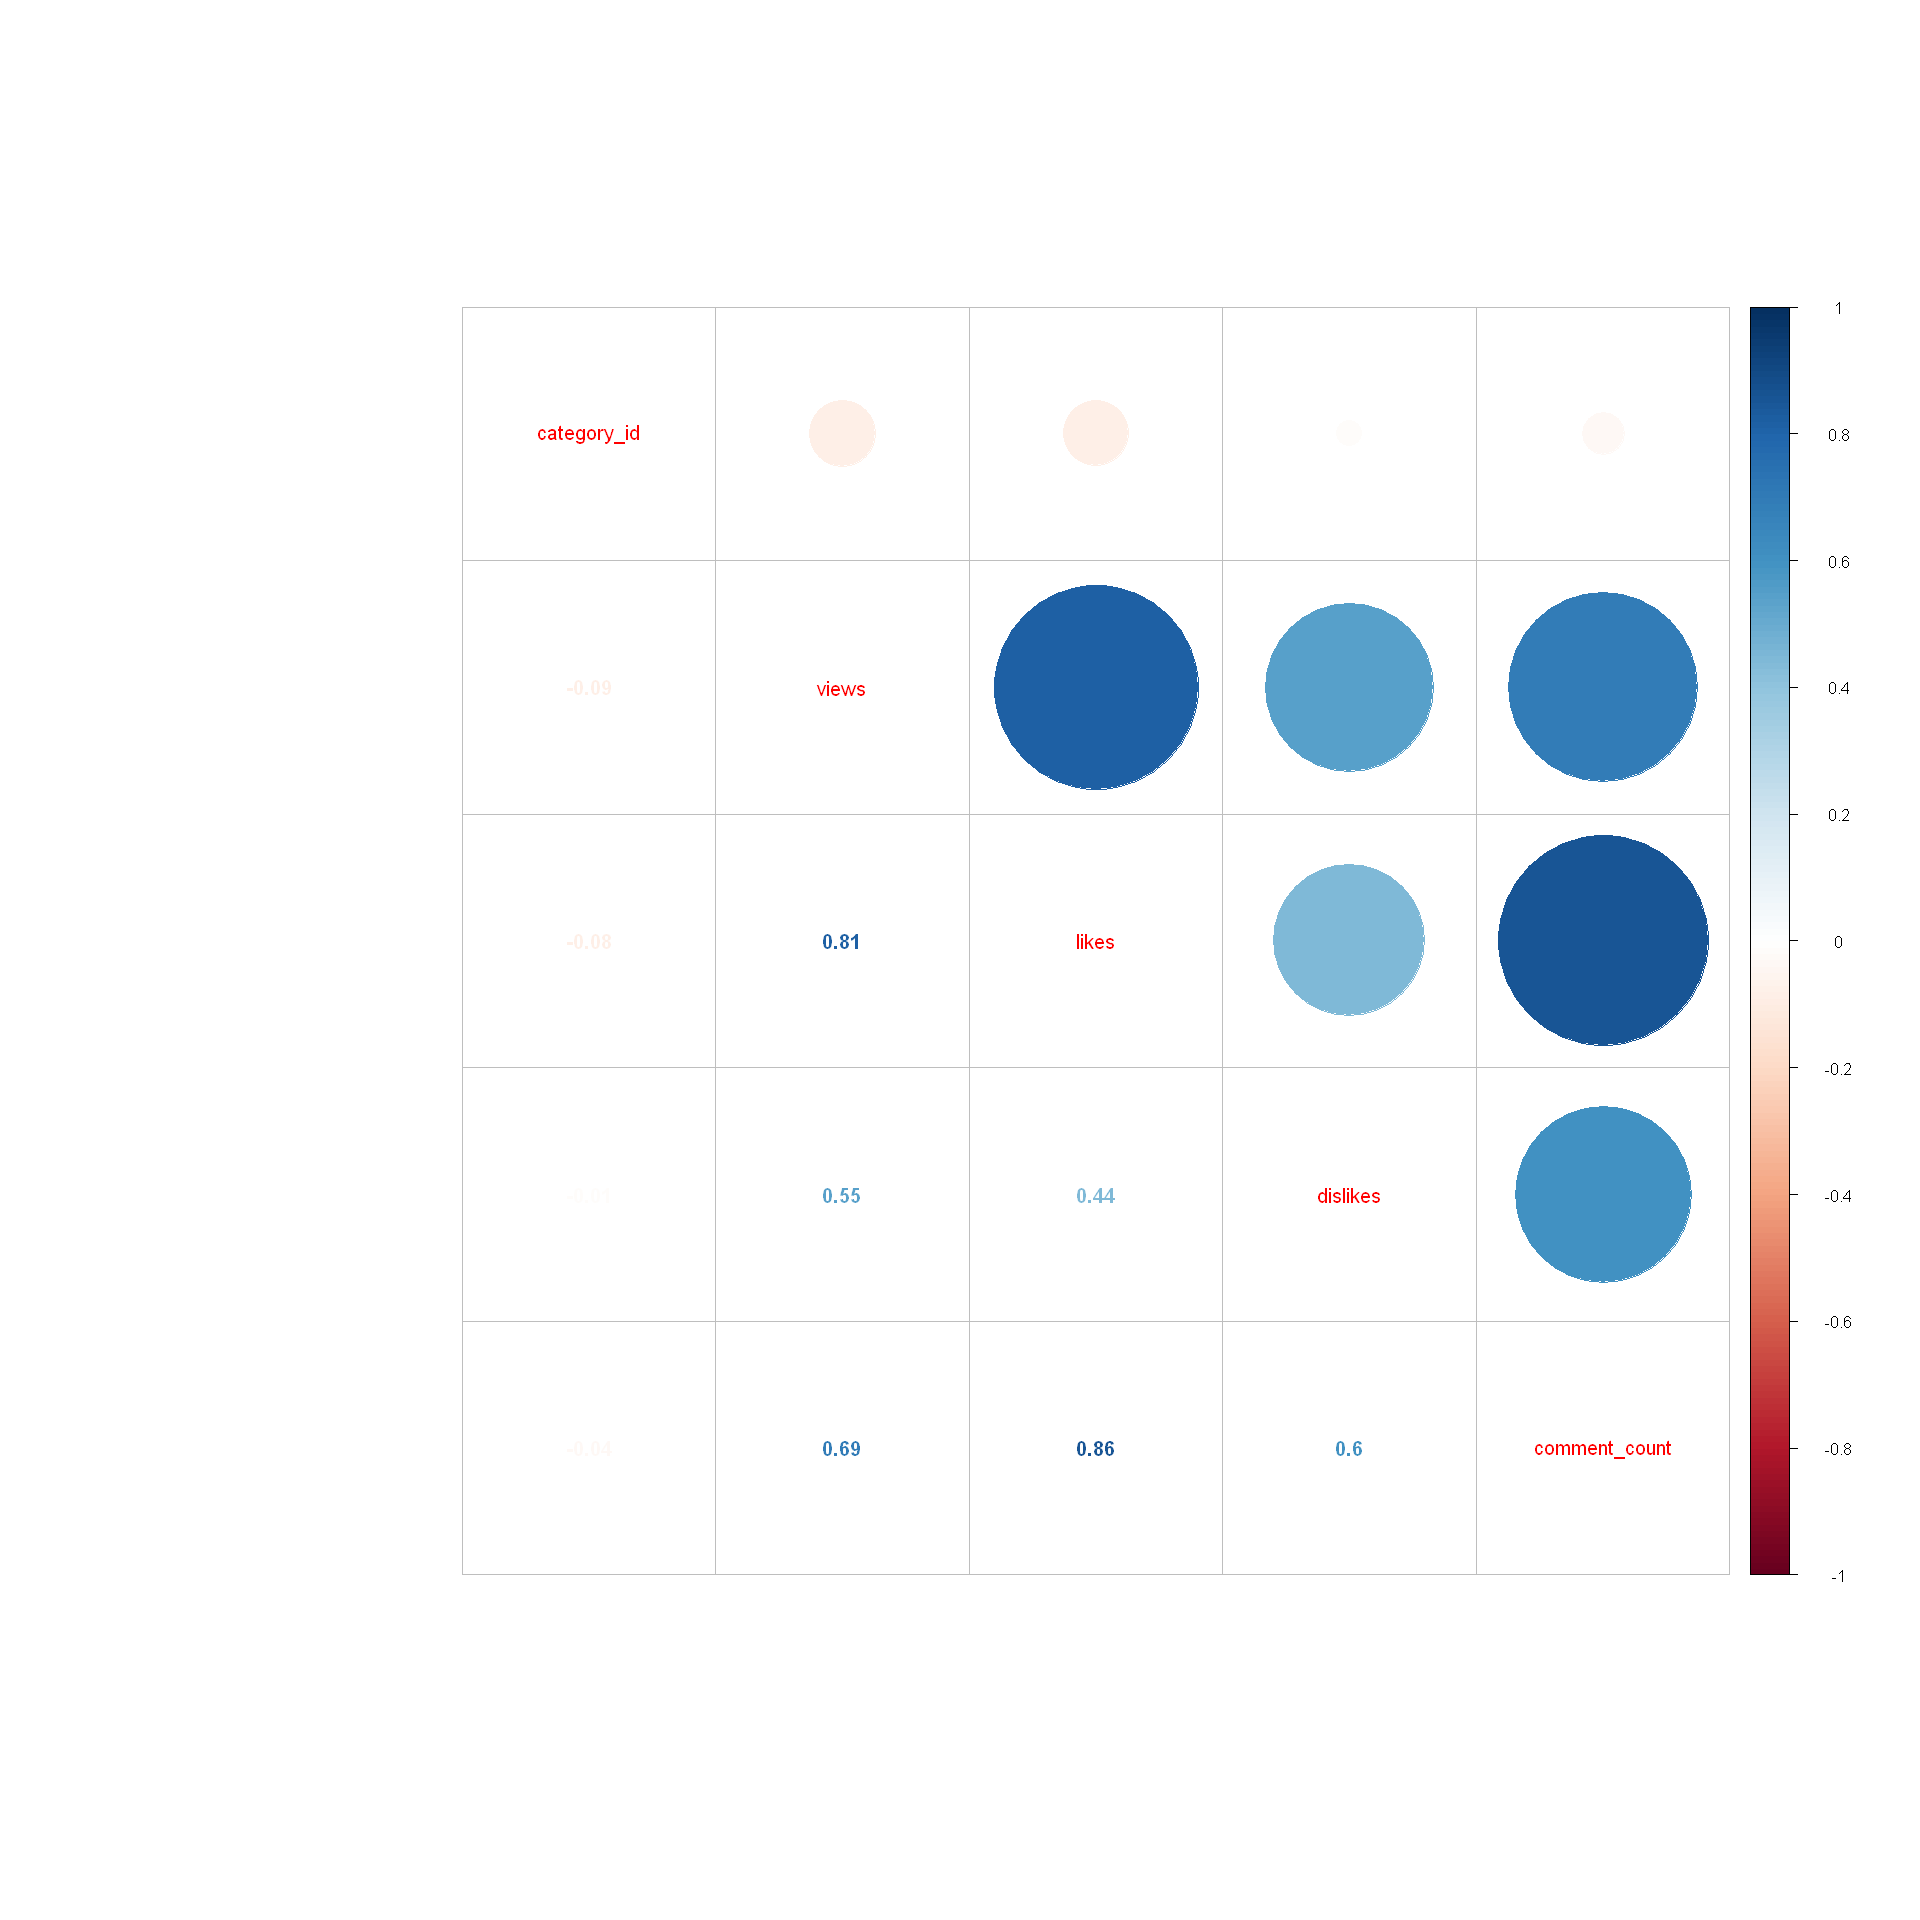

In [7]:
corrplot.mixed(corr = cor(df_all[,c("category_id","views","likes","dislikes","comment_count")]))  #,with=F removed

[1] 50000

Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, toSpace, "@"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, toSpace, "\\|"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeWords, c("")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, stemDocument):
"transformation drops documents"Warning message in brewer.

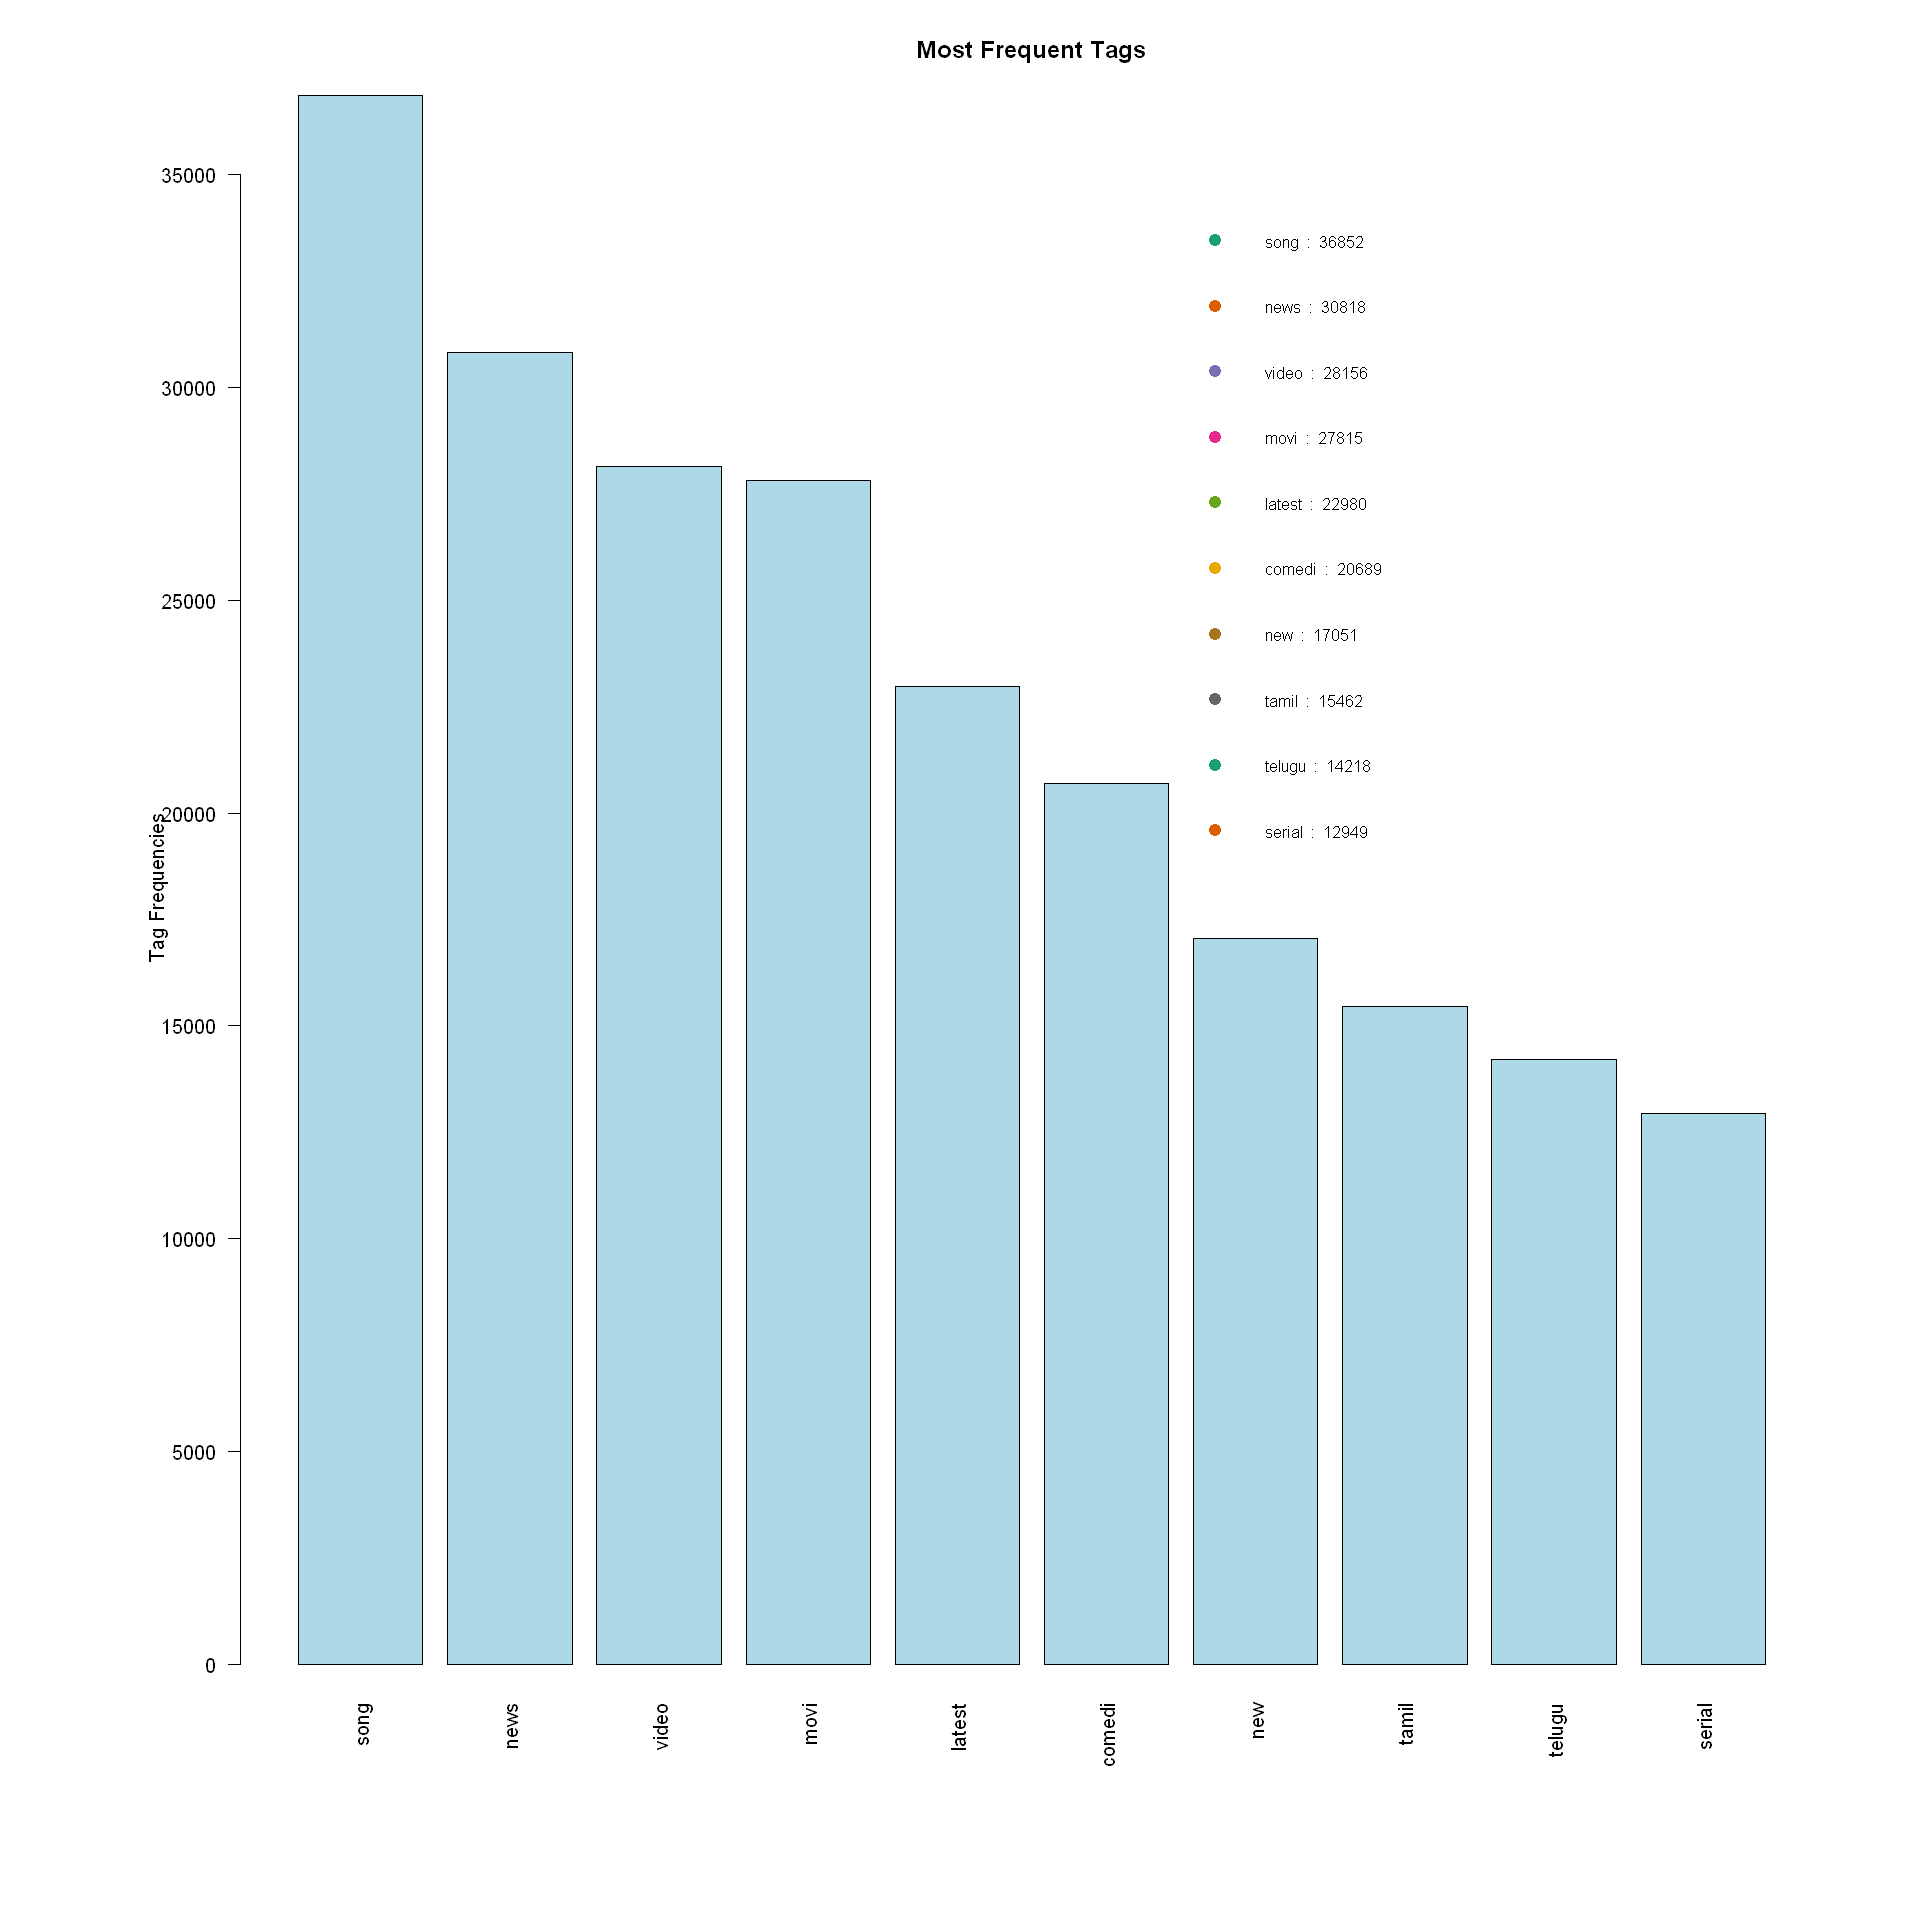

In [8]:
#I will use In's data set to check "tags".

Encoding(df_in$tags) <- "UTF-8"
text <- df_in$tags

#memory size increasing
memory.limit(size=50000)
# Load the data as a corpus
docs <- Corpus(VectorSource(text))

toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")

# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove your own stop word
# specify your stopwords as a character vector
docs <- tm_map(docs, removeWords, c("")) 
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)
# Text stemming
docs <- tm_map(docs, stemDocument)

dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)

# Increase bottom margin
par(mar=c(10,10,4,4))

barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most Frequent Tags",
        ylab = "Tag Frequencies")

legend("topright", legend = paste(d[1:10,]$word, " : ", d[1:10,]$freq) , 
     col = brewer.pal(n = 10, name = "Dark2") , 
     bty = "n", pch=20 , pt.cex = 2, cex = 0.8, horiz = FALSE, inset = c(0.05, 0.05))

Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"marjawan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vairamuthu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bharya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kalyanaparisu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rishhsom could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"maharaj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sarthak could not be fit on page. It will not b

"aarti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"folk could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lawyer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"parisu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chalo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"xiaomi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kuripu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"radikaa c

"seetamma could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sikharam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"skirt could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"paper could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mangamma could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chote could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"moon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"masa

"sharri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"qtiyapa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"activ could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shahrukh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"app could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"uncl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"technicalguruji could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :


"iruttu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"padukon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rahman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"genr could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"visit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"biscuit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"darshan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"raat 

"competit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ban could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"clean could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mass could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"navryachi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"railway could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hollywo

"mathew could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mobil could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"care could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ninja could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"feb could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ooltah could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"angel could not

"gokuldham could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"indrajith could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aaha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lakshyam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"margadarsi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sukhibhava could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"coach could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pa

"muddha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"roman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kaadhal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"audit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"divya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jaya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kavya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"growth cou

"mashup could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"araiyil could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"intellig could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092E><U+0948><U+091A> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"awanish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"evict could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brew

"naveen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"teen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thoothukudi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rathika could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"peek could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tejwani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"masti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bha

"ysrcp could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nahi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mallemalatv could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gippi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ravichand could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"propos could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"madhavi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"

"nag could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"studyiq could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"montu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lalu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kshanam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aagatha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pitcher co

"green could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B9A><U+0BBF><U+0BA9><U+0BBF><U+0BAE><U+0BBE> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"humbl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bharti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vishwa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"grahan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dress could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.fr

"incred could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"soccer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kevin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"opinion could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"veerji could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"matrimoni could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mercuri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"s

"dya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dharia could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"firangi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kadam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"eswari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gunna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"raghwani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sekhar 

"ranam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kammara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sambhavam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saakshyam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tonight could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"devaimag could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sathiyam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(

"madra could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"poov could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"room could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"anam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jagapathi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jallikattu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"primetim could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kay

"machin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kabali could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hadd could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sevilla could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dino could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tovino could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tcp could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kee could n

"jabykoay could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"neeraj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"flow could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mera could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"abi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"svf could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tarsem could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"grahanam coul

"badshah could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khiladi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chris could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"goswami could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"marwadi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"raa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ramesh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"journ

"sivaji could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jassar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sankranti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"koteswar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lekha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"poovi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"munda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bas

"becom could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"unseen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kalyani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"judg could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ultim could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"suprem could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"metro could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"quint cou

"wish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"deol could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bawa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sare could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"armaan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sadist could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"supercel could n

"rohini could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"messi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"poetri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"allindiabakchod could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"benip could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nitish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"isha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"

"<U+0938><U+093F><U+0902><U+0939> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"johar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bff could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"loan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"anbu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"valencia could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kemon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = bre

"fortnit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pagg could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tellymasala could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kishan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nithya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sundeep could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092A><U+093E><U+0913><U+0917><U+0947> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.fr

"bubbl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wrap could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"eic could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"arora could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"anita could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"panther could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cloth could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bumper could 

"jaani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ice could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khair could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"governor could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aggress could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0916><U+092C><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B9A><U+0BC2><U+0BAA><U+0BCD><U+0BAA><U+0BB0><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordc

"bride could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nazarbattu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ambani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"qureshi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gujjubhai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mukkoti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"samuthirakani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.

"aloo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"activist could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lakh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"blog could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shukla could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"think could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"madurai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vamsi cou

"newsglitz could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0906><U+092F><U+0947><U+0917><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"banker could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092E><U+093E><U+0930><U+0935><U+093E><U+0921><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092E><U+093E><U+0930><U+0935><U+093E><U+095C><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"meenatchi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"darbar 

"tell could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ronaldo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"browser could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"stereotyp could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"surat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"panju could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"secur could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"veera

"chandu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"depress could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"maratha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"reshmi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khatri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"subramanian could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"

"place could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jab could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"letter could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gole could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ludo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"caus could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BA4><U+0BAE><U+0BBF><U+0BB4><U+0BCD><U+0BA8><U+0BBE><U+0B9F><U+0BC1> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$wor

"shera could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"apoorva could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"njan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"suit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gangstar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"siddiqui could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tape could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"childho

"classroom could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rajiv could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ganguli could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"better could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"akula could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"button could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"paritala could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"g

"kunchacko could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sekar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"usha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mangu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kabhi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ralli could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhadipa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ajit co

"madhavan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jashan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mayawati could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"million could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kapur could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gaba could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"signific could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"r

"aparnathi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"batua could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bugni could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"golak could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ramaswami could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rascal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kotigobba could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :


"aisha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"superb could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"malaga could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"stranger could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"account could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"zakir could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"biryani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"blo

"appatlo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"okadundevadu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"anjana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cola could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"amrind could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kori could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C06><U+0C30><U+0C4B><U+0C17><U+0C4D><U+0C2F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, 

"prais could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sonia could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pimpl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cheputha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0906><U+092A><U+0915><U+0947> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vodafon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"afridi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, color

"respect could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"panrom could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"paudwal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tamannaah could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"draw could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aanand could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"banjara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"s

"flame could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"websit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"badai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gadi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mahiya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"medaram could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kondagattu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dehr

"duniya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dvv could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sip could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thanthram could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saiyan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vesav could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"marykutti co

"tirumala could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"giddha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"movieclip could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"garu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chamatkari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gharelu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"uppc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :


"virgin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mallika could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rvcj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"poe could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cancer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"leav could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"practic could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mike could

"ramasami could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sametha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"neenu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tfpc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"oliv could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"awkward could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"masam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0935

"redpix could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gujrat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nidhi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kurt could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"abhijeet could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BA8><U+0BC6><U+0B9F><U+0BC1><U+0BA8><U+0BCD><U+0BA4><U+0BCA><U+0B9F><U+0BB0><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C1A><U+0C42><U+0C21><U+0C02><U+0C21><U+0C3F> could not be fit 

"<U+0915><U+0941><U+092E><U+0915><U+0941><U+092E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092D><U+093E><U+0917><U+094D><U+092F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fidaa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rona could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0938><U+093E><U+0925> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aunti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kanya could not be fit on page. It will not be plotted."W

"junga could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D28><U+0D4D><U+0D2F><U+0D42><U+0D38><U+0D4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ohmkar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wargi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"holland could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hulk could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vidyavathi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, mi

"flop could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"robo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"selfish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"athlet could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"panjabi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092D><U+0915><U+094D><U+0924><U+093F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"amithbhargav could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.fre

"razer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gujaratinatak could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gujaratishortfilm could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gujarativin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"surti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"veeran could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mytholog could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors =

"mithuna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shubathidi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vruschika could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vrushaba could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sannidhi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"billion could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saradaga could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.

"kolamaavu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sarabhai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"malika could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"prada could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dayama could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lathiya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lsd could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pok

"compitit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+091C><U+0928><U+0935><U+0930><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"phere could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pind could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhabhi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sherma could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rememb could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5

"shut could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"blackmail could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jaswind could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lamborghini could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"farah could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"makeov could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"henri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"

"niveditha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fanfest could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"xmen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kochi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"soonawalla could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tesla could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dhirubhai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :

"sanaya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sext could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"stebin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"orayyo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aravindha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sukhman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"avan c

"nai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lunch could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ccl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hooda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"freeticket could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dora could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vaishnavi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rangula 

"behan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"baitikochi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"syllabus could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"close could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sleep could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"scubehungama could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sheikh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6,

"script could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"psv could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rawkne could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"common could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chandragiri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ramdev could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ole c

"con could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"burj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jagannath could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pardeep could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dur could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"janhvi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"liy could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"keshav could

"towel could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sonarika could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mahindra could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"empower could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"prostitut could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mediaon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C07><U+0C35><U+0C3E><U+0C02><U+0C15> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min

"swim could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lingeri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BB0><U+0BBE><U+0B9C><U+0BB2><U+0B9F><U+0BCD><U+0B9A><U+0BC1><U+0BAE><U+0BBF> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mustach could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ini could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kaundinya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bavkar could not be fit on page. It will not be plotted."Warning message 

"bird could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"coke could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wood could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"percent could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"request could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chezhian could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092E><U+0930><U+093E><U+0920><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5,

"yamuna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fauji could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rangasthalana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dorababu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"srilekha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"song<U+0D1F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chitvan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewe

"shivjot could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kushboo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhuro could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"madhyamam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nirhuaa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"janata could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dalbeer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :


"walt could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vaaram could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mapilai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fakir could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chavhan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dulhin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dangar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"abarna

"saran could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"indonesia could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rupani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chust could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cafe could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saptagiri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C15><U+0C4B><U+0C38><U+0C02> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, col

"saloon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sehgal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sadak could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sahi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhaiya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sankar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0928><U+

"bhavya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yaaruda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BA4><U+0BC6><U+0BB0><U+0BBF><U+0BAF><U+0BC1><U+0BAE><U+0BBE> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bumrah could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rupe could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mile could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ganesan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$wor

"azhar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"centurion could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sarakka could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"espanyol could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kanchana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kach could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sunainaa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :

"aid could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saurabh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"joe could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C2E><U+0C3E><U+0C35><U+0C3E><U+0C38><U+0C4D><U+0C2F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nuclear could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"deshpand could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092E><U+093E><U+0932><U+093E><U+092E><U+093E><U+0932> could not be fit on page. It will 

"anusre could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"neeru could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BB0><U+0B9C><U+0BBF><U+0BA9><U+0BBF><U+0B95><U+0BBE><U+0BA8><U+0BCD><U+0BA4><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ranaut could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"capricorn could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"benjamin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kareja could not be fit on page. It will not be plotted."Warn

"mayor could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"faster could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lead could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ramana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0915><U+093F><U+092F><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wash could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"profit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = b

"ambati could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0A97><U+0AC1><U+0A9C><U+0AB0><U+0ABE><U+0AA4><U+0AC0> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"midrang could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"journalist could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0907><U+0938> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jeevan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gaalivaaluga could not be fit on page. It will not be plotted."Warning message in 

"talsania could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ajya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhaiyyasaheb could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"epsido could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jamya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jaydi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sheetal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"

"uae could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"menu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"casual could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sacr could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nimisha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aliv could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"heyman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bullet could 

"newmovi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"newteas could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"newtrail could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"telugufilm could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chemistri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vehicl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"remot could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6

"aptitud could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"reduc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"keith could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jim could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"taurus could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bunni could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092A><U+0935><U+093E><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = b

"weed could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shift could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhalla could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"scientif could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"baljit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jasprit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"namak could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"manuel

"murena could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nithyananditha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ammu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"permish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aisa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bada could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khamoshi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"

"patalu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"amaravati could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"milegi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saath could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"senior could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mms could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BAE><U+0BC0><U+0BA9><U+0BBE><U+0B9F><U+0BCD><U+0B9A><U+0BBF> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$wo

"juliet could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ilnyckyj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rath could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"magnet could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"medium could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"raman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"venjaramoodu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"

"hummer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"inter could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kaalath could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gomez could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"australian could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rangasthlam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pisharodi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(

"legan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rahe could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tanuja could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhavishya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BA8><U+0B9F><U+0BBF><U+0B95><U+0BC8> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"york could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sengupta could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 

"shivarajkumar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gunturodu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"reliev could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gora could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"veet could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thalaivar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"touchchesichudu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brew

"munnaal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"klove could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kimbho could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"zarda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tomi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"billionair could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0938><U+093F><U+0915><U+094D><U+0915><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, mi

"fafe could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"zone could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ambika could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"communic could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"haryaanvi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dhivya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"surabhi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kuk

"<U+0928><U+093E><U+0936><U+094D><U+0924><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rabb could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhosl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vinay could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"beder could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"josna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mey could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5

"iipl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"laaj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sharam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"agt could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kheer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"naag could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sanghera could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chaisam could

"suárez could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mahima could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"namah could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nain could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chunav could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"popat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C18><U+0C28><U+0C38><U+0C4D><U+0C35><U+0C3E><U+0C17><U+0C24><U+0C02> could not be fit on page. It will not be plotted."Warning message in wordcloud

"chahi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sartaj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tamannah could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jangra could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ravivar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"malhar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mast could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shade

"<U+0917><U+091C><U+092C> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0935><U+0948><U+0937><U+094D><U+0923><U+094B> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0936><U+094D><U+0930><U+0940><U+0927><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jagi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"amen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ameya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cauch could not be fit on page. It will not be plo

"sentenc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"closer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wisdom could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"infinit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"livestream could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cavanagh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gustin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, 

"<U+0C1A><U+0C47><U+0C38><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hudavi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kabeer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C28><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"deshmukh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nivedita could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq,

"forens could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"alom could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"excit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhagamati could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kalai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mcdonald could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hood could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"site c

"tourist could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+091C><U+094D><U+092F><U+094B><U+0924><U+093F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chhattisgarh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"haircut could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pachadi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"poochoodava could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jawani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$wor

"shyam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dhoka could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tune could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ibrahim could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"edna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"elastigirl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"filmwork could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"baza

"tast could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"solvathellam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"radharavi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"richa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hurrican could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"loui could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tori could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"m

"sruti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B9A><U+0BC1><U+0BB0><U+0BC1><U+0BA4><U+0BBF> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2E><U+0C39><U+0C47><U+0C37><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"satsang could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"laavan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"veena could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"duryodhana could not be fit on page. It will not be plotted."Warning mes

"<U+0C30><U+0C3E><U+0C1C><U+0C40><U+0C35><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rangarao could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C28><U+0C38><U+0C42><U+0C2F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chappu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sscchsl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"uppolic could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"diggi could not be fit on page. It will not be plotted."Warning mes

"naayaka could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yerusalem could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gutka could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"outbreak could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lini could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nasreen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bulleya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"

"kbc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yamaha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"owen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"supergirl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C15><U+0C3E><U+0C2E><U+0C46><U+0C02><U+0C1F><U+0C4D><U+0C38><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C1A><U+0C3F><U+0C30><U+0C02><U+0C1C><U+0C40><U+0C35><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"avni could not be fit on 

"gaali could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"teach could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C28><U+0C3F><U+0C39><U+0C3E><U+0C30><U+0C3F><U+0C15><U+0C24><U+0C4B> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"recap could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jean could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"stump could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"spathwwebrl could not be fit on page. It will not be plotted."Warning message in wordcl

"mallikarjuna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sohi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"narayanan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bun could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"patni could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cham could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092A><U+0939><U+0932><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colo

"boil could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"poor could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chackochan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mappillai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sakhavu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ammuvint could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kharbanda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6,

"bhagvad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"raajakumara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"prapancha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"behara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tvpotti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yes could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"roadster could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6,

"ultah could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"youtuberewind could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"worldwid could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"janasainik could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"telanagana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sindhi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fakira could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer

"altbalaji could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bald could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"border could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"misra could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tamiltrollvideo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cock could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"esteem could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :

"wallan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wlaa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C1C><U+0C3E><U+0C28><U+0C4D><U+0C35><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shridhar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"las could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"palma could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"outrag could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.fre

"parthi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ekalavya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aay could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dafaa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhanelo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"solomon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jokihat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"icch

"shastra could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"audianc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"door could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sptiawayrma could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"arjunan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"phir could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"solanki could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"

"vishesh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ride could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"joey could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gamer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"belief could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chaupal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"drishti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kanaga 

"jaiswal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mahatv could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C15><U+0C24><U+0C4D><U+0C24><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vitamin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"guilti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dayal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"suchayaar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.fre

"majid could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"majidi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"paad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kavan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"homag could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aeroplan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ratri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ashtak co

"shopper could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sweetest could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"whistl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhag could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bonda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dhvanit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mir could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jaai co

"raika could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"andhrajyothi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"karwa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"parava could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tone could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0932><U+0949><U+091F><U+0930><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"purushothaman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, mi

"benzema could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sangrur could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+091F><U+093E><U+0907><U+0917><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+095B><U+093F><U+0902><U+0926><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"meenakumari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nagasri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"povathu could not be fit on page. It will not be plotted."Warning messa

"chip could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"legendari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nooran could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hote could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kyu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ipad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"flynn could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"xiomi could 

"tkss could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jazzi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"panday could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lay could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"namdu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nimdu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"oota could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jord could not 

"sbiclerkprelim could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gaadi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"collegehumor could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sunehri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0907><U+0924><U+0928><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0915><U+091F><U+0935><U+093E><U+0924><U+0947> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092C><U+0922><U+093C><U+0947><U+0917><U+0940> could not be fit

"hiddleston could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhargavi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"magnus could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"galattacom could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"feet could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ohmygod could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"iqbal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, 

"samvida could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"oak could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vaidehi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"funpanromlatest could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"neeraali could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"neerali could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nieraali could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pa

"tailor could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"etc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rum could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"salim–sulaiman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0926><U+0940><U+092A><U+0915> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C37><U+0C4D><U+0C1F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C10><U+0C36><U+0C4D><U+0C35><U+0C30><U+0C4D><U+0C2F><U+0C3E><U+0C32><U+0C41> could not be

"nit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2E><U+0C4B><U+0C21><U+0C40> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mankirat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"heizer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"katherin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"langford could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bugganchuna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 

"nda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C2F><U+0C3F><U+0C24><U+0C47> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"picha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"zanjeer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"melvin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0906><U+0928><U+0947> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"harbhajan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d

"<U+0926><U+0942><U+0938><U+0930><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chattrapati could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"volum could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"satyajit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"falcon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"clay could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"zach could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq 

"thunder could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bharatanenenu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kanani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sethi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sundergarh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vevo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kawad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, 

"awar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"facial could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dulhania could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"responc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lmao could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rumman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aayirathil could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U

"premam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"talpad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kaushiki could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gadar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"brighton could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"san could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wright could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"leksh

"jasmer could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gordon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"changaathi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"changathi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nannaaya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"supari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chowdhuri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal

"watchmen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"geya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"panchak could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"blanket could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tharangam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0907><U+0902><U+0926><U+094C><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0915><U+092A><U+094D><U+0924><U+093E><U+0928> could not be fit on page. It will not be plotted."Warning m

"sivakumar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shayari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nachi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aarya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gajinikanth could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"alluarjun could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"anson could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6,

"<U+0938><U+0947><U+0902><U+091A><U+0941><U+0930><U+093F><U+092F><U+0928> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"stark could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C24><U+0C3E><U+0C30><U+0C4D><U+0C28><U+0C3E><U+0C15> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"magician could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vellai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dekhna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"astha could not be fit on page

"rangasthalamsong could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"latk could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kullfi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vasishta could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"grindelwald could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"samajwadi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092C><U+0947><U+091F><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, m

"cps could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khushali could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tulsikumar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"actorali could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saradhaaga could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"spbalu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tisca could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, 

"vamasam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vasam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vijayakumar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BB5><U+0BAE><U+0BCD><U+0B9A><U+0BAE><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0930><U+093F><U+092A><U+094B><U+0930><U+094D><U+091F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nyc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kalam could not be fit on page. It will not be plotte

"sushmita could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0916><U+093F><U+0932><U+093E><U+092B> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"alway could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rakshan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vaiko could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"appu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kgf could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, c

"okhi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lagan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"drs could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saazish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"reel could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"trajendar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shafi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"muzik coul

"greedi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tanushre could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pranitha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mahavinashini could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mahavinshini could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"meher could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"parilok could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewe

"banwaril could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"toddi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"innoc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"avrprank could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"manwar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bharatwaj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"punam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"t

"sabarish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C0E><U+0C32><U+0C3E><U+0C02><U+0C1F><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vishu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"consult could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cheez could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rathnam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cyber could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, mi

"<U+091C><U+092F><U+0902><U+0924><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"butterfli could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"faisal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mrunal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"charmm could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"laa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"icecream could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq 

"ponnaal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mugan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"poo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saamy² could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thameen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"panipuri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"calli c

"<U+0B95><U+0BAE><U+0BB2><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"major could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"simbhu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"male could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"upload could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dobara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"acr could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = br

"surekha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"championship could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"haseen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lata could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rog could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"upendra could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rise could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rome

"jayasudha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jihad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C38><U+0C02><U+0C2C><U+0C02><U+0C27><U+0C02> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chotu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"puttu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nashik could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.

"<U+0C2C><U+0C3E><U+0C2C><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"natti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0905><U+0928><U+092A><U+095D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0939><U+093E><U+0932><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"baski could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D05><U+0D35><U+0D38><U+0D4D><U+0D25> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"specif could not be fit on page. It w

"msuic could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"epiccomeback could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092C><U+093E><U+092C><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C06><U+0C30><U+0C4B><U+0C1C><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C02><U+0C1F><U+0C41><U+0C28><U+0C4D><U+0C28> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C39><U+0C32><U+0C4B> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"backbench coul

"jaegi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vjsiddhu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0938><U+0907><U+092F><U+093E><U+0902> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"leinster could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"satellit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"moga could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tamilserialtrol could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq,

"<U+0916><U+093F><U+0932><U+093E><U+0921><U+093C><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ishan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"prithvi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bagamathi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chahida could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sptihomefcb could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dalveer could not be fit on page. It will not be plotted."Warning message in wordcloud(d

"bhari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pushkar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kissa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kalesh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C26><U+0C41><U+0C2C><U+0C3E><U+0C2F><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khera could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0938><U+093E><U+0924><U+093E><U+0930><U+093E> could not be fit on page. It will not be plotted."Warning 

"khana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"paypal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BA8><U+0BBE><U+0B9F><U+0BCD><U+0B9F><U+0BC1><U+0BAA><U+0BCD><U+0BAA><U+0BC1><U+0BB1> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0938><U+0932><U+092E><U+093E><U+0928> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kuddi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gautami could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jigel could not be fit on page. 

"<U+092D><U+093E><U+0917><U+0947> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0930><U+095E><U+094D><U+0924><U+093E><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D2A><U+0D3F><U+0D28><U+0D4D><U+0D28><U+0D40><U+0D1F><U+0D4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gaadha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thatt could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mrchandramouli could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kushinagar cou

"childish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kitni could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nehakakkar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"battleground could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0AAB><U+0ABE><U+0AAB><U+0AA1><U+0ABE> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0936><U+0930><U+094D><U+092E><U+0928><U+093E><U+0915> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"arjuna could not be fit on page. It will not be plot

"mantar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"past could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"washington could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"motorola could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kodang could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"arti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B8E><U+0B9F><U+0BAA><U+0BCD><U+0BAA><U+0BBE><U+0B9F><U+0BBF> could not be fit on page. It will not be plotted."Warning message in wordcloud(d

"paudha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mounima could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lmes could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wreck could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"knife could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nishant could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bryan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rozana c

"graphic could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vice could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sufi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C1A><U+0C3F><U+0C28><U+0C4D><U+0C28> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"platform could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C07><U+0C35><U+0C3E><U+0C02><U+0C15><U+0C3E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"morrow could not be fit on page. It will not be plotted."Warning message

"patan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bear could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sentiment could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"leg could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"palkkari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"penn could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"grandfath could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"achra

"pednekar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gng could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sada could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nita could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0915><U+0947><U+0938><U+0930><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"praveenkl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"comeback could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 

"gazhal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pichaikaran could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C07><U+0C2A><U+0C4D><U+0C2A><U+0C41><U+0C21><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhinda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092A><U+0930><U+093F><U+0937><U+0926> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"redio could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2A><U+0C3E><U+0C30><U+0C4D><U+0C35><U+0C24><U+0C3F> co

"<U+0C24><U+0C3F><U+0C02><U+0C1F><U+0C41><U+0C28><U+0C4D><U+0C28><U+0C3E><U+0C30><U+0C3E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"allasani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vaari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shudhdesiend could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"underarm could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chaudari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"filmymonk could not be fit on page. It will not be plo

"wadkar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vaccin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"musik could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"expecto could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"patronum could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0CB6><U+0CBF><U+0CB5><U+0CB0><U+0CBE><U+0CA4><U+0CCD><U+0CB0><U+0CBF> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0916><U+093E><U+090F><U+0902><U+0917><U+0947> could not be fit on page. It w

"taza could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"udwio could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0939><U+093E><U+0926><U+0938><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0939><U+0941><U+0935><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pray could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"spring could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"eco could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d

"cskanthem could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cameraguy could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bureaucraci could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"convert could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wetransf could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"girlfiend could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0918><U+093E><U+092F><U+0932> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, mi

"bari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"roger could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tamilseithig could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"navneet could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"anudeep could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"durishetti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"clashh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6,

"nbanja could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"punajb could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"basicallyidowrk could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dabb could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dabe could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"muhfaad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"indiabul could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, 

"pravachanam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"roomat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vidhansabha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kunchakko could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"foodporn could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ghmc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"adaalat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.p

"<U+0B95><U+0BBE><U+0BB0><U+0BA3><U+0BAE><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0938><U+093E><U+095D><U+0947><U+0938><U+093E><U+0924><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2A><U+0C47><U+0C30><U+0C41><U+0C32><U+0C4B> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2C><U+0C1F><U+0C4D><U+0C1F><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0905><U+092D><U+093F><U+092F><U+093E><U+0928> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+091C><U+092C><U+0930><U+0926><U+0938><U+094D><U+0924> could not be f

"alvish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"foster could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saudi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"zahid could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"info could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"abhiruchi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sargi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"min cou

"claim could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lalithaa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"denni could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bowler could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"snan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092C><U+091F><U+094B><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"parivartan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, col

"canteeni could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shoe could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"surgeri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BAA><U+0BBE><U+0BB0><U+0BCD><U+0BB5><U+0BA4><U+0BBF> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vibrant could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092A><U+093E><U+0915><U+093F><U+0938><U+094D><U+0924><U+093E><U+0928> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"udann could not be fit on pag

"imax could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"batmya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"paaji could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"namast could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tenor could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"annu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aryan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"veilakkaran 

"teamfilmbhojpuri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mahotsavam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vinothraj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nightstay could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mankatha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"teliyadu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chalal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors 

"chalda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shivn could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C30><U+0C3E><U+0C15><U+0C47><U+0C37><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"walmart could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"monster could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"skranti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C38><U+0C02><U+0C15><U+0C4D><U+0C30><U+0C3E><U+0C02><U+0C24><U+0C3F> could not be fit on page. It w

"<U+0C38><U+0C41><U+0C28><U+0C40><U+0C24> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kothagudem could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shrunk could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D24><U+0D40><U+0D7C><U+0D24><U+0D4D><U+0D24> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D2C><U+0D3E><U+0D39><U+0D41><U+0D2C><U+0D32><U+0D3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D35><U+0D47><U+0D26><U+0D3F><U+0D2F><U+0D3F><U+0D7D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.fre

"tehlan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D35><U+0D3F><U+0D35><U+0D3E><U+0D39><U+0D02> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cloverfield could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"separ could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092C><U+091C><U+0930><U+0902><U+0917><U+092C><U+0932><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"exhusband could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sankatmochan could not be fit on page. I

"<U+0C05><U+0C32><U+0C3E><U+0C17><U+0C47> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C06><U+0C2B><U+0C40><U+0C38><U+0C41><U+0C15><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2C><U+0C46><U+0C1F><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2E><U+0C42><U+0C21><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C35><U+0C38><U+0C4D><U+0C24><U+0C3E><U+0C28><U+0C28><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chiln could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$

"peddapuli could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yellamma could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lagi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B95><U+0BBF><U+0BB0><U+0BBF><U+0B95><U+0BCD><U+0B95><U+0BC6><U+0B9F><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nitibha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0905><U+0902><U+0924><U+094D><U+092F><U+0938><U+0902><U+0938><U+094D><U+0915><U+093E><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, color

"golabhama could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sukumaar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shivamogga could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"charter could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hums could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ammal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yaadv could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :


"saldana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"zoe could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"daasan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"venus could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mcent could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D07><U+0D19><U+0D4D><U+0D19><U+0D28><U+0D46> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D15><U+0D3F><U+0D1F><U+0D15><U+0D4D><U+0D15><U+0D41><U+0D28><U+0D4D><U+0D28><U+0D41> could not be fit on 

"zingaat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nagireddi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sptiawaycel could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0926><U+0947><U+0935><U+094B><U+0902> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"spread could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"italian could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"delsi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, mi

"<U+0921><U+092C><U+094D><U+092C><U+0942> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"amudhan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thuppaki could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"agit could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jhootha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"syamala could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"barsha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq

"bhojpurilanguag could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhojpurising could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhojpurivideo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhojpuriworld could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hindibhojpuri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vidyarthi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"spirtual could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.

"wyom could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lena could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pillai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"illam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B89><U+0BAF><U+0BBF><U+0BB2><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0930><U+093E><U+091C><U+0938><U+093E><U+0939><U+0947><U+092C> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C28><U+0C41><U+0C17><U+0C4D><U+0C30><U+0C39><U+0

"sherpa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"terenc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pindi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"spain could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"arbaaz could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"casemiro could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mccarthi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"che

"harman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rea could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0915><U+0941><U+092E><U+094D><U+092D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0924><U+0930><U+0940><U+0915><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aacharya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"panda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"noushad could not be fit on page. It will not be plotted."Warning message in word

"ammayilu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B95><U+0BB0><U+0BC1><U+0BA4><U+0BCD><U+0BA4><U+0BC1> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"oasi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"scifi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vijaysai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C38><U+0C2E><U+0C2F><U+0C02><U+0C32><U+0C4B> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"borud could not be fit on page. It will not be plotted

"<U+0B87><U+0BA4><U+0BC8> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"meteor could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"scinew could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"compar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bindhu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mahendran could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"largest could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = 

"aamrpali could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"booz could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"muh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C0F><U+0C21><U+0C4D><U+0C1A><U+0C47><U+0C38><U+0C3F><U+0C28> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pelt could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C15><U+0C41><U+0C2C><U+0C47><U+0C30><U+0C41><U+0C32><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BAA><U+0BC7><U+0B9F><U+0BCD><U+0

"dicemedia could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pros could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"srntr could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vijayalakshmi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hanger could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sarasvati could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sarsvati could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal

"shortgirl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"weekday could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ayurvedtipsinhindi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"spevwwerumbl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C9A><U+0C82><U+0CA6><U+0CCD><U+0CB0> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"purpos could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"festivala could not be fit on page. It will not be plotted."Warning message in wordcloud(d$

"odd could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"anubavinchu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cutter could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"notout could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ruler could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0930><U+0947><U+0938><U+093F><U+092A><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pervert could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, m

"<U+0C2A><U+0C4B><U+0C32><U+0C40><U+0C38><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2F><U+0C1C><U+0C3E><U+0C2E><U+0C3E><U+0C28><U+0C4D><U+0C2F><U+0C02> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C35><U+0C3F><U+0C21><U+0C3F><U+0C1A><U+0C3F><U+0C02><U+0C26><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C39><U+0C4B><U+0C1F><U+0C32><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dismi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jhanvikapoor could not be fit on page. It will not be plotted."Warning message in 

"photographi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ajinkyatara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dangerzon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mamotti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"indorikar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"keyboard could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"imdb could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewe

"oma could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sayantika could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"srabonti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mujko could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0915><U+0941><U+0932><U+0926><U+0940><U+092A> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0938><U+0947><U+0902><U+0917><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"susana could not be fit on page. It will not be plotted."Warning messa

"<U+0924><U+0942><U+092B><U+093E><U+0928><U+092C><U+093E><U+0930><U+093F><U+0936> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0924><U+0947><U+0932><U+0902><U+0917><U+093E><U+0928><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0926><U+093F><U+0932><U+094D><U+0932><U+0940><U+090F><U+0928><U+0938><U+0940><U+0906><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092A><U+0936><U+094D><U+091A><U+093F><U+092E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092A><U+094D><U+0930><U+093E><U+0907><U+0935><U+0947><U+091F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.fre

"mohana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"daafa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jitanai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jitanu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"playoff could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0921><U+093F><U+0935><U+093F><U+0932><U+093F><U+092F><U+0930><U+094D><U+0938> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"alhawat could not be fit on page. It will not be plotted."Warning messag

"<U+0D2D><U+0D3E><U+0D30><U+0D4D><U+0D2F><U+0D2F><U+0D3E><U+0D2F><U+0D3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D2D><U+0D3E><U+0D30><U+0D4D><U+0D2F><U+0D3E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"giga could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cryi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tharali could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kevinkatha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhalchandra could not be fit on page. 

"rishab could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shrishti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"itna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tum could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"listicl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"eask could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"extrem could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"beef coul

"samvritha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D06><U+0D30><U+0D3E><U+0D27><U+0D15><U+0D7C> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"heena could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ashritha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C28><U+0C3F><U+0C32><U+0C3F><U+0C1A><U+0C3F><U+0C28> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2E><U+0C33><U+0C4D><U+0C32><U+0C40> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C35><U+0C3E><

"usag could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pendriv could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"usuri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kadavul could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"superson could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"forecast could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0928><U+093E><U+092E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = b

"soniya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fridaypost could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sisodia could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"samaram could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"trumph could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ayodhya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dimman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :

"<U+0905><U+092C><U+094D><U+0926><U+0941><U+0932><U+094D><U+0932><U+093E><U+0939> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092B><U+093E><U+0930><U+0942><U+0916> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0641><U+064A><U+063A><U+0648> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"clc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C38><U+0C4D><U+0C38><U+0C32><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C15><U+0C4A><U+0C1F><U+0C4D><U+0C1F><U+0C21><U+0C3E><U+0C28><U+0C3F><U+0C15><U+0C3F> could not be fit on page. I

"divyank could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jag could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bio could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"udhaari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"solvadhellam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"heel could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"marudhu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rams

"angelo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"centur could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"indvssl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sportstrack could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rav could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"asuka could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dhai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"filth

"aidmk could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"puth could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"asura could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C38><U+0C40><U+0C30><U+0C3F><U+0C2F><U+0C38><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kitab could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ammai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D1E><U+0D46><U+0D1F><U+0D4D><U+0D1F><U+0D3F><U+0D15><U+0D4D><U+0D15><U+0D41><U+0D28><U+0D4D><U+0D28

"masha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"convict could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sunmeera could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thuklak could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"unadkat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hazari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kanda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sy

"pub could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2E><U+0C02><U+0C1A><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C35><U+0C3F><U+0C30><U+0C4B><U+0C28><U+0C3F><U+0C15><U+0C3E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C35><U+0C3F><U+0C37><U+0C4D><U+0C23><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"katchi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C02><U+0C21><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :

"<U+0C35><U+0C46><U+0C02><U+0C1F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tamizhan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C06><U+0C21><U+0C41><U+0C15><U+0C41><U+0C28><U+0C4D><U+0C28> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C1A><U+0C46><U+0C21><U+0C41><U+0C17><U+0C41><U+0C21><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C2E><U+0C40><U+0C21><U+0C3F><U+0C2F><U+0C3E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0938><U+093E><U+092E><U+0928><U+0947> could not be fit on page. It will not be plotted."Warning mess

"<U+0C2A><U+0C3E><U+0C30><U+0C3E><U+0C37><U+0C42><U+0C1F><U+0C4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"daari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sheg could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"goophon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mimic could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vairamuthus could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+091C><U+0938><U+094D><U+091F><U+093F><U+0938> could not be fit on page. It will not 

"bhagan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kautaliya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"neeyanandam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"japanes could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gurind could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"soul could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<

"<U+0C06><U+0C26><U+0C3F><U+0C35><U+0C3E><U+0C30><U+0C02> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C38><U+0C42><U+0C30><U+0C4D><U+0C2F><U+0C2D><U+0C17><U+0C35><U+0C3E><U+0C28><U+0C41><U+0C21><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C39><U+0C43><U+0C26><U+0C2F><U+0C02> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khubban could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"organis could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C05><U+0C35><U+0C15><U+0C3E><U+0C36><U+0C02> could not be fit on page. It will not be plotted."Warnin

"<U+0938><U+0941><U+0928><U+094D><U+0928> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"acter could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pouli could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"prithwi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bewafai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092E><U+0902><U+0924><U+094D><U+0930><U+093E><U+0932><U+092F> could not be fit on page. It will not be plotted.

"zabardasti could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092C><U+0928><U+093E><U+092F><U+0947><U+0902> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"swimm could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"zamana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ynk could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rajyasabha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhaavana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$fre

"naalai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"namadh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C24><U+0C40><U+0C38><U+0C41><U+0C15><U+0C41><U+0C28><U+0C4D><U+0C28> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C26><U+0C24><U+0C4D><U+0C24><U+0C24> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"madhvi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BAE><U+0BAF><U+0BCD><U+0BAF><U+0BAE><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"senso

"<U+092C><U+0949><U+0932><U+0940><U+0935><U+0941><U+0921> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092E><U+093F><U+0938><U+094D><U+091F><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092E><U+0941><U+0924><U+093E><U+092C><U+093F><U+0915> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0930><U+093E><U+091C><U+0926><U+0942><U+0924> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0935><U+0949><U+0932><U+0940><U+0935><U+0941><U+0921> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0936><U+0941><U+0930><U+0942><U+0906><U+0924> could 

"feminist could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khol could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"spbsp could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tuj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bastar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"crpf could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"donga could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"policekilled

"kondaji could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0915><U+094B><U+0902><U+0921><U+093E><U+091C><U+0940> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092B><U+0930><U+094D><U+091C><U+0902><U+0926> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"choi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"patanam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"regrowth could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tutak could not be fit on page. It will not be plotte

"ovul could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aayiram could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aym could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vaaranam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"cbsc could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B9A><U+0BBF><U+0BB5><U+0B95><U+0BBE><U+0BB0><U+0BCD><U+0BA4><U+0BCD><U+0BA4><U+0BBF><U+0B95><U+0BC7><U+0BAF><U+0BA9><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"riya could not be fit on page

"shotgun could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D35><U+0D27><U+0D41><U+0D35><U+0D3F><U+0D28><U+0D4D><U+0D31><U+0D46> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rangalalatest could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"somavara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sardai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"toyota could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"boldi could not be fit on page. It will not be plotted."Warning message

"<U+0AA4><U+0ACB> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"joban could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sajawan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"blain could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vertigo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"boparai could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hape could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6,

"mahanadhi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nagaswin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"prasadh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"realis could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sheela could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhangara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhangda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6,

"karnatakacmrac could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"oagth could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sworn could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ytoday could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0CAF><U+0CA1><U+0CBF><U+0CAF><U+0CC2><U+0CB0><U+0CAA><U+0CCD><U+0CAA> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+09AB><U+09B2> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"brainless could not be fit on page. It will not be plotted."Warni

"thenmala could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dyfi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shocker could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"riddhi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fingeprint could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fingperint could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fngerprint could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pa

"strode could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dik could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D05><U+0D31><U+0D4D><U+0D31><U+0D4D><U+200C><U+0D32><U+0D38><U+0D4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D1C><U+0D4B><U+0D23><U+0D4D><U+200D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D2C><U+0D4D><U+0D30><U+0D3F><U+0D1F><U+0D4D><U+0D1F><U+0D3E><U+0D38><U+0D4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D30><U+0D3E><U+0D2E><U+0D1A><U+0D28><U+0D4D><U+0D26><U+0D4D><U+0D30><U+0D28><U+0D4D><U+200D> could not be fit on p

"<U+0B9C><U+0BC6> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"preeth could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"overview could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dhivakaran could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"craziebawa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lynch could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yashwant could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = b

"websei could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+091C><U+0940><U+0938><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0932><U+0947><U+0917><U+094D><U+092F><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"agrahara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"indain could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B9A><U+0B9A><U+0BBF><U+0B95><U+0BB2><U+0BBE><U+0BB5><U+0BBF><U+0BA9><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"fli

"broadcast could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"puttaparthi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sandler could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"viay could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dulha could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"padmavathi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hitman could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6

"twilight could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bhasin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ambareesh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"compact could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yojana could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"salon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sankaramanchi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal

"<U+092A><U+092A><U+0940><U+0924><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kamaleswar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"loser could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"micheal could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C26><U+0C3E><U+0C21><U+0C3F> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sahu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B86><U+0BB0><U+0BCD><U+0B95><U+0BC7><U+0BA8><U+0B95><U+0BB0><U+0BCD> could not be

"goggl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"virtual could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"knew could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092B><U+0930><U+094D><U+091C><U+0940><U+0935><U+093E><U+0921><U+093C><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C26><U+0C47><U+0C35><U+0C41><U+0C21><U+0C41> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0C1A><U+0C42><U+0C38><U+0C4D><U+0C24><U+0C47> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.p

"periyapandi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jugaad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dolli could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0B95><U+0BBE><U+0BB5><U+0BB2><U+0BCD> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D05><U+0D2E><U+0D4D><U+0D2E><U+0D2F><U+0D41><U+0D1F><U+0D46> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"ghulam could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0D15><U+0D41><U+0D31><U+0D1E><U+0D4D><U+0D1E><U+

"<U+0D2A><U+0D31><U+0D1E><U+0D4D><U+0D1E><U+0D24><U+0D4D> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mohanraja could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"spend could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mint could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"judwaa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0917><U+0902><U+0917><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"diljeet could not be fit on page. It will not be plotted."Warning messa

"garudavega could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"dilawar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bollwood could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pradosh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"enceph could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rakhunga could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"path could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, 

"naaperusuryanaailluindia could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nsnifirstimpact could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aalayavani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"shreeranjani could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yarlagadda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"funnyindianvideo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"indianvideo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$wor

"hidu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0915><U+093E><U+091C><U+0932> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"wagl could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"scratch could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chaiy could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chakd could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"balkar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = b

"sangbad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"thakurjibhajan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"agra could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"asoci could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"loner could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"blank could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"secretari could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :

"hen could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gaddi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"doordarshann could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"republicdayparad could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sambhajiraj could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092A><U+094D><U+0930><U+091C><U+093E><U+0938><U+0924><U+094D><U+0924><U+093E><U+0915> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0930><U+093E><U+091C><U+092A><U+0925> could n

"<U+0913><U+092E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0915><U+0936><U+094D><U+092F><U+092A> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092A><U+093E><U+0924><U+094D><U+0930><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0938><U+093E><U+0902><U+092A><U+094D><U+0930><U+0926><U+093E><U+092F><U+093F><U+0915> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"koechlin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"margarita could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, 

"nattupura could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"devada could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chobara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pada could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0906><U+091C><U+093E> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092C><U+0928><U+0915><U+0947> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+092C><U+094D><U+092F><U+093E><U+0939><U+0932><U+0940> could not be fit on page. It will not be plo

"<U+0926><U+094D><U+0935><U+093E><U+0930> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"architect could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khabo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"upchar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"agnifera could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"banara could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"pur could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq =

"champak could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"includ could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sahay could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"humanitarian could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"magnat could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"melinda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"philanthropist could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.

"manama could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bachao could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"mona could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bacon could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vasan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"miranda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"indraadip could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"nalai

"<U+092C><U+093E><U+0924><U+091A><U+0940><U+0924> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bobbili could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kandhukuri could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kumbham could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"kundarapu could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"saiteja could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tare could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$f

"hariandnaresh could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"jumcput could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aahvaan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vdahiya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"zin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0906><U+0939><U+094D><U+0935><U+093E><U+0928> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+091C><U+093F><U+0928><U+094D><U+0928> could not be fit on page. It will not be plotted."Warning

"<U+0B95><U+0BC7><U+0BB5><U+0BB2><U+0BAE><U+0BBE><U+0B95> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BAA><U+0BB1><U+0BCD><U+0BB1><U+0BBF> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0BAA><U+0BC7><U+0B9A><U+0BBF><U+0BAF> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"chess could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"yolo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"khandkekar could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"rangammatta could not be fit

"akkiankitvideo could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"annapoorna could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"biggi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"bahama could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"barracuda could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"marlin could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"sailfish could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer

"tarifaa could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"tarifaan could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"harjaap could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"<U+0935><U+093E><U+092F><U+0930><U+0932> could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"donchez could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"brendun could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"typesof could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.

"kerela could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"aamra could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"lakshya could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"murphi could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"syntel could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"trey could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"vike could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"trendng c

"goblet could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"gryffindor could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hagrid could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hallow could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hedwig could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"hermion could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, :
"quidditch could not be fit on page. It will not be plotted."Warning message in wordcloud(d$word, d$freq, min.freq = 5, colors = brewer.pal(6, 

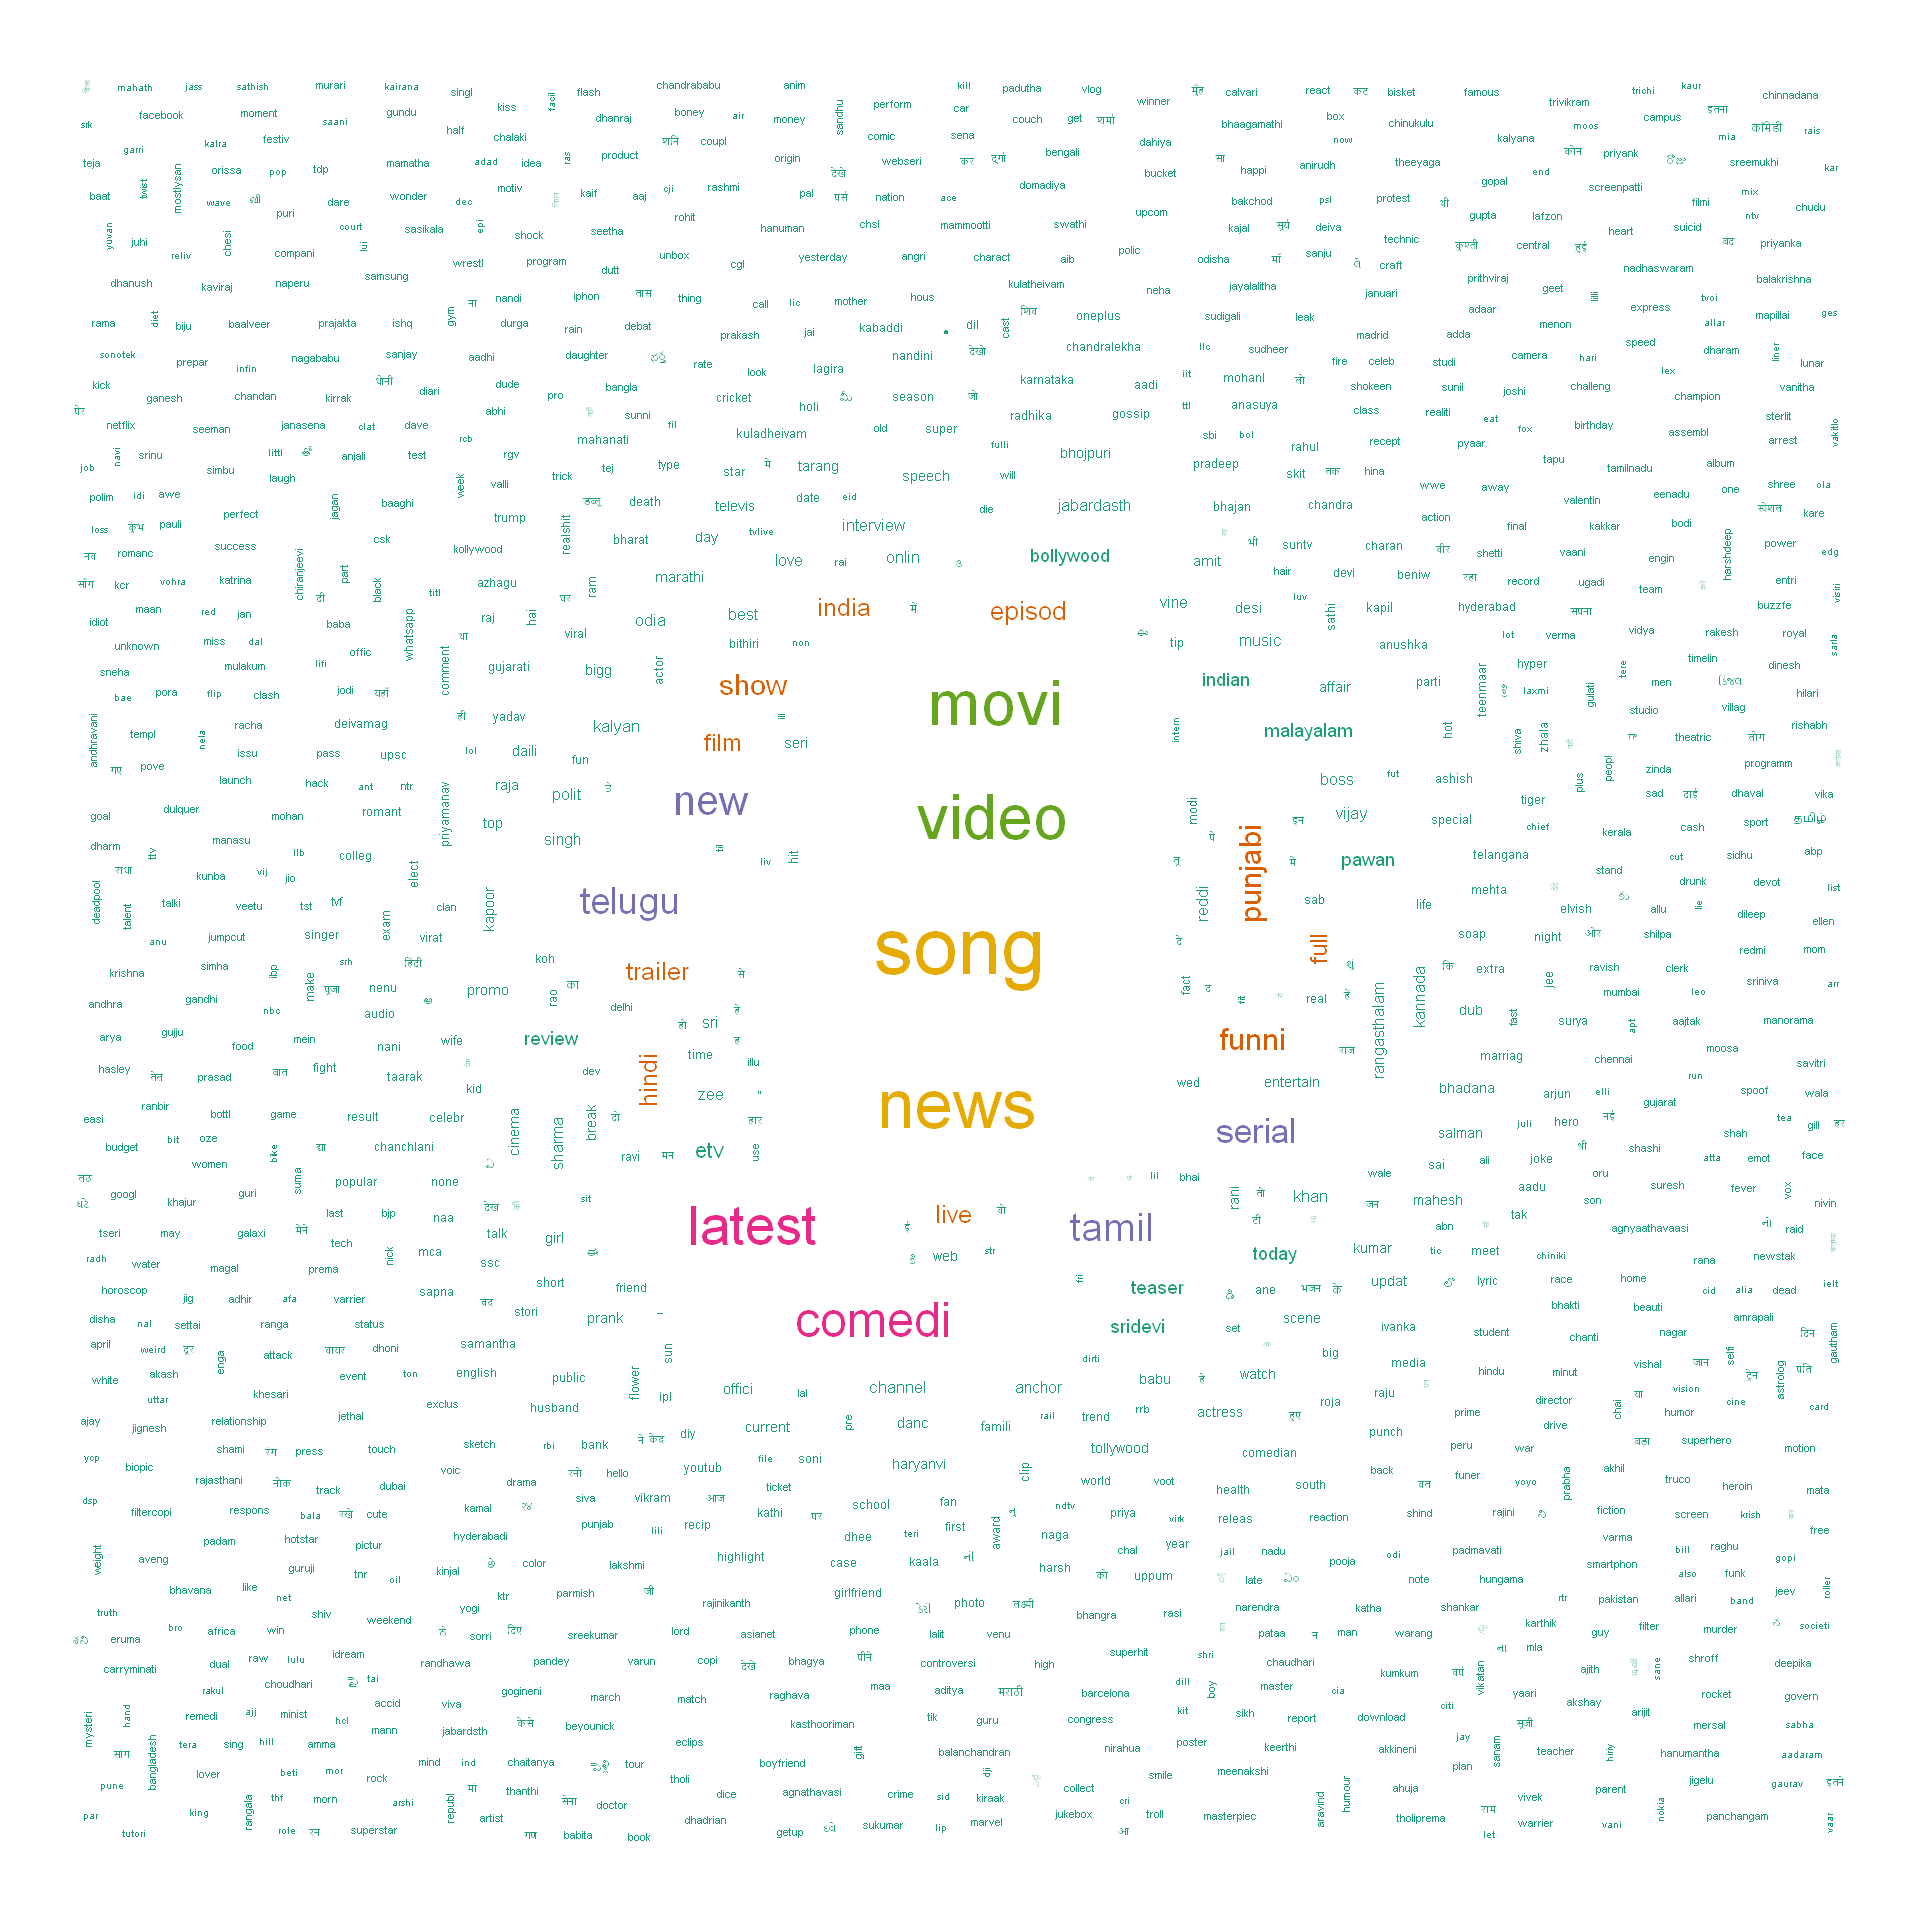

In [9]:

#corpus = Corpus(VectorSource(list(sample(df_all$title,size=2000))))

#corpus = tm_map(corpus, removePunctuation)

#corpus = tm_map(corpus, content_transformer(tolower))

#corpus = tm_map(corpus, removeNumbers) 

#corpus = tm_map(corpus, stripWhitespace)

#corpus = tm_map(corpus, removeWords, stopwords('english'))



#dtm_eap = DocumentTermMatrix(VCorpus(VectorSource(corpus[[1]]$content)))

#freq_eap <- colSums(as.matrix(dtm_eap))



#sentiments_eap = calculate_sentiment(names(freq_eap))

#sent_video = cbind(sentiments_eap, as.data.frame(freq_eap))

#sent_video[contains(match = "uu",vars = sent_video$text),"freq_eap"] <- 0L

#Tags wordcloud
wordcloud(d$word,d$freq, min.freq=5,colors=brewer.pal(6,"Dark2"),random.order = F)

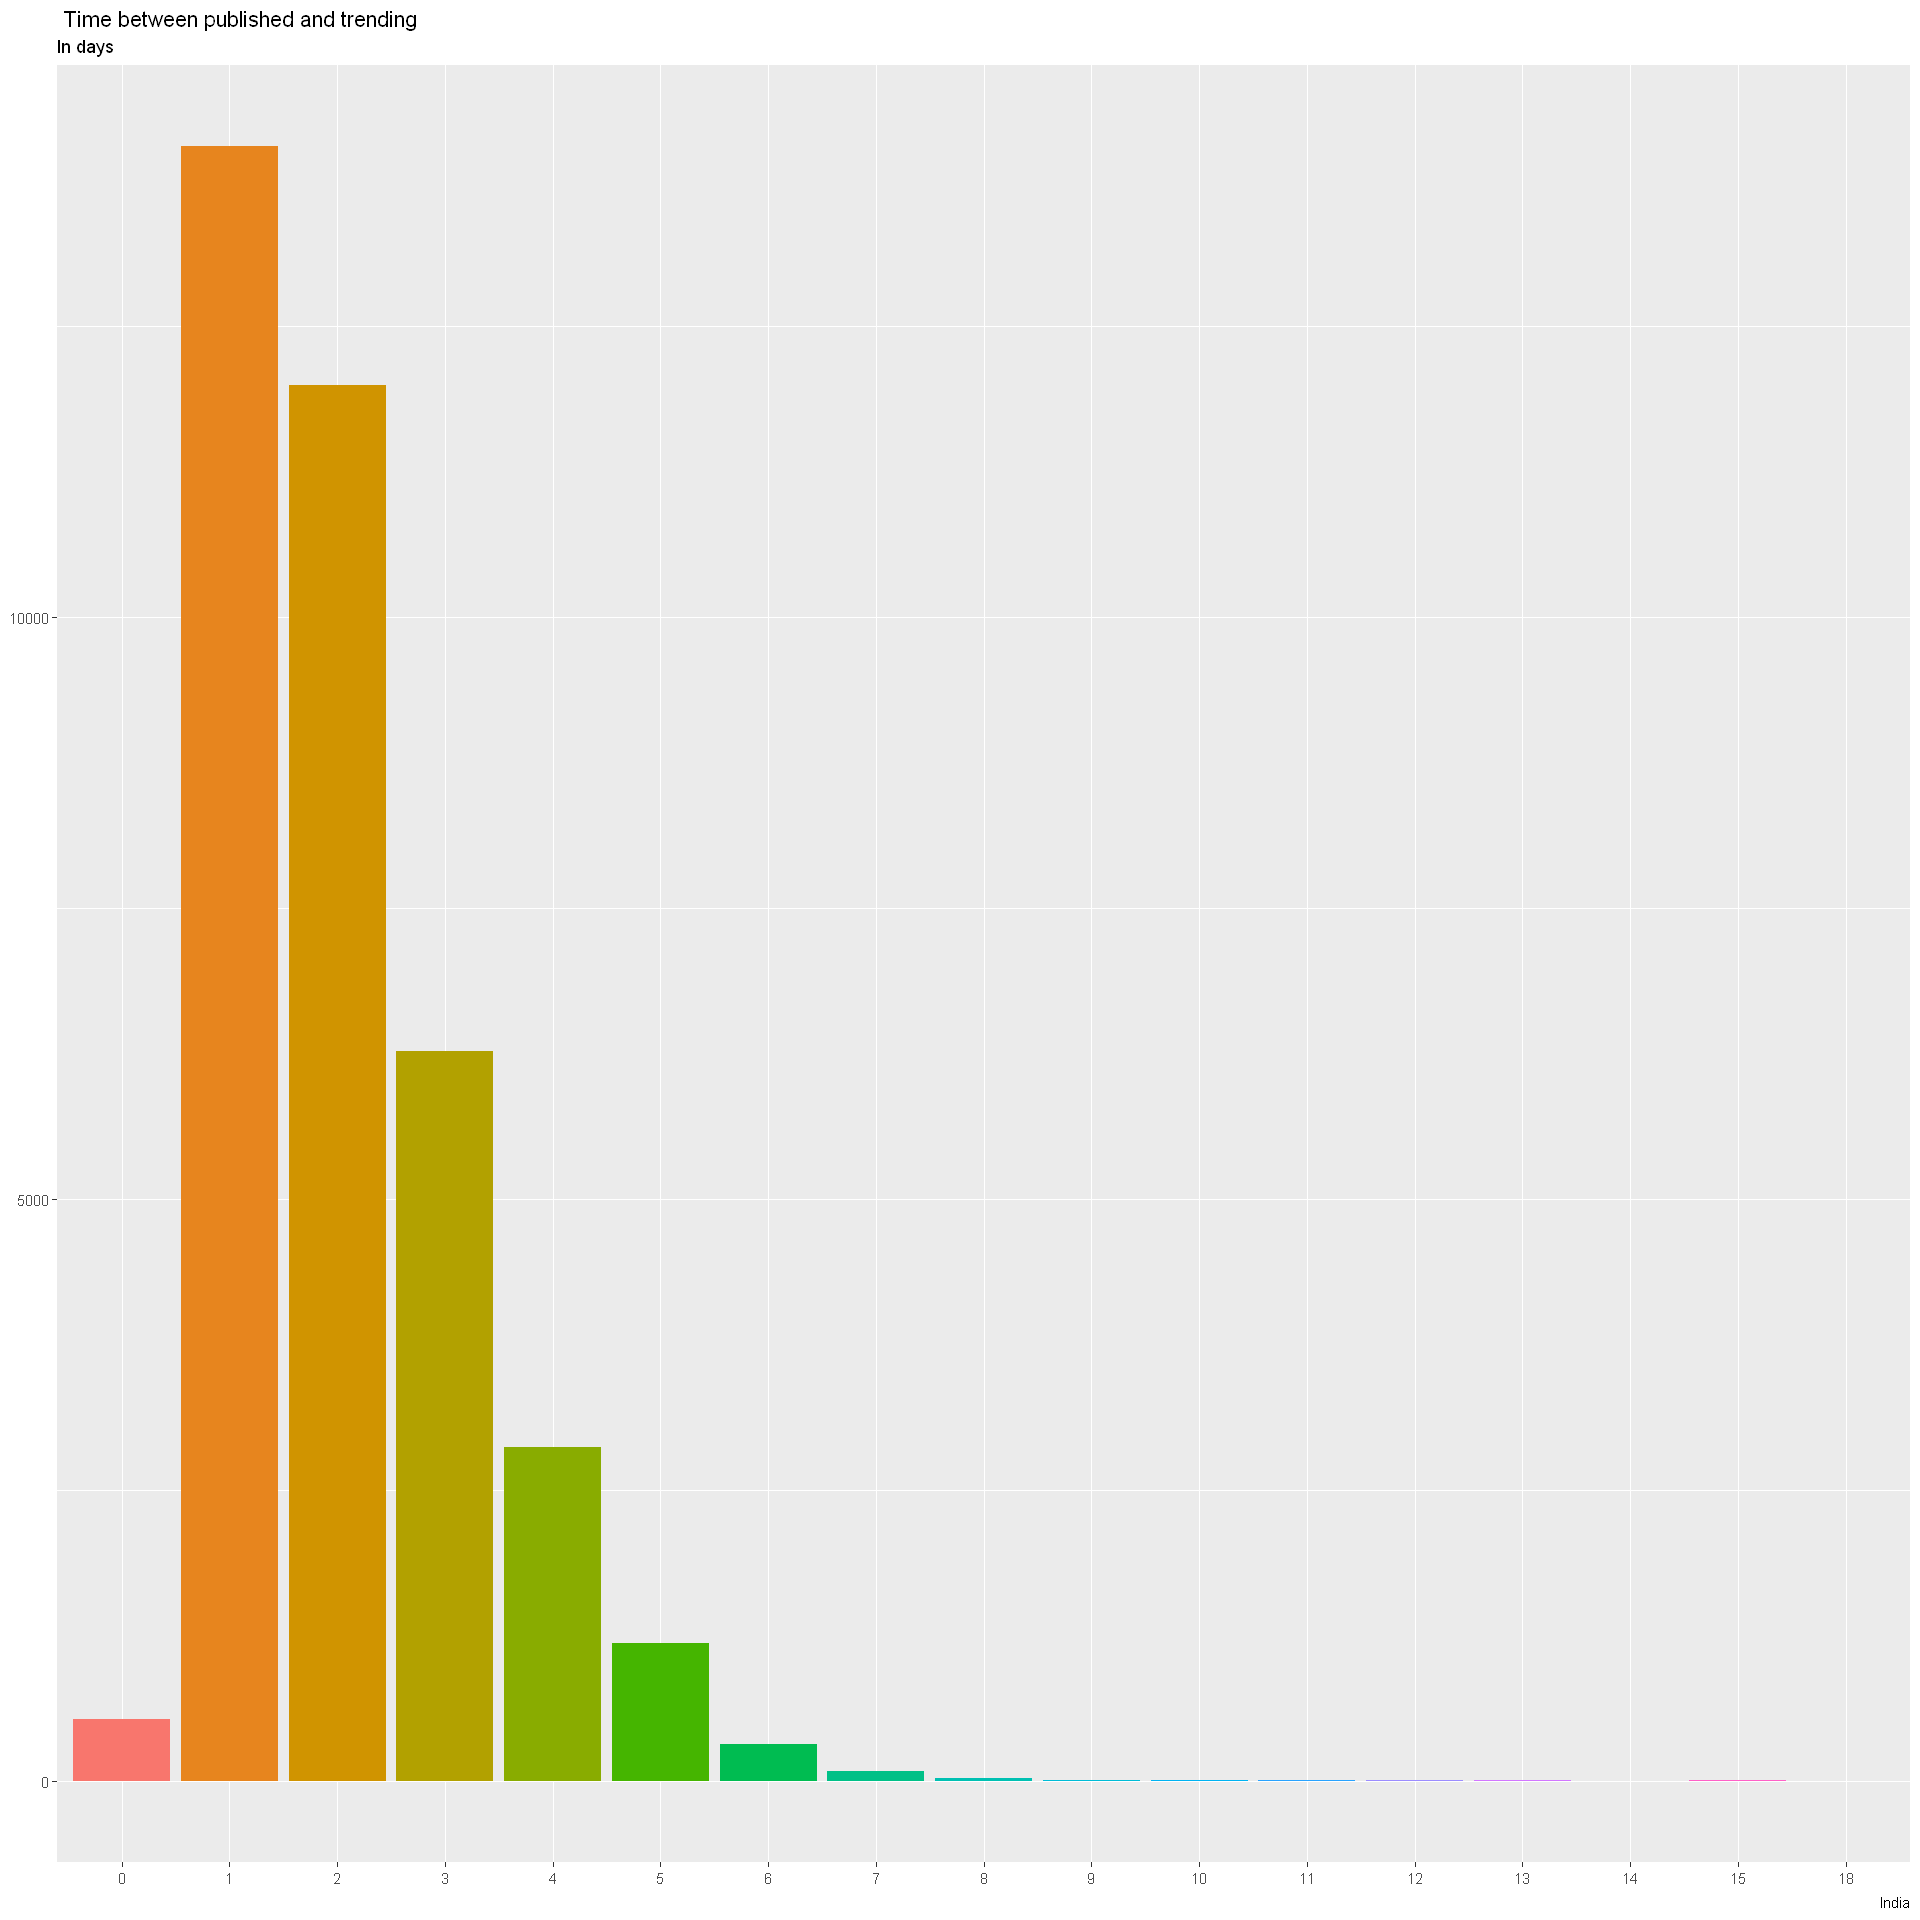

In [10]:

df_in$trending_date <- ydm(df_in$trending_date)

df_in$publish_time <- ymd(substr(df_in$publish_time,start = 1,stop = 10))

df_in$dif_days <- df_in$trending_date-df_in$publish_time

#How much time passes between published and trending?   #ONLY FOR INDIA
ggplot(df_in[dif_days<30,],aes(as.factor(dif_days),fill=as.factor(dif_days)))+geom_bar()+guides(fill="none")+labs(caption="India",title=" Time between published and trending",subtitle="In days")+xlab(NULL)+ylab(NULL)

In [11]:

df_all$trending_date <- ydm(df_all$trending_date)

df_all$publish_time <- ymd(substr(df_all$publish_time,start = 1,stop = 10))

df_all$dif_days <- df_all$trending_date-df_all$publish_time

#using for all countries
ggplot(df_all[dif_days<40,],aes(as.factor(dif_days),fill=as.factor(dif_days)))+geom_bar()+guides(fill="none")+labs(caption="Countries",title=" Time between published and trending by countries",subtitle="In days")+xlab(NULL)+ylab(NULL)+facet_wrap(~country)

ERROR: Error in `[.data.frame`(df_all, dif_days < 40, ): object 'dif_days' not found


Warning message:
"Ignoring unknown parameters: check_overlap"`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


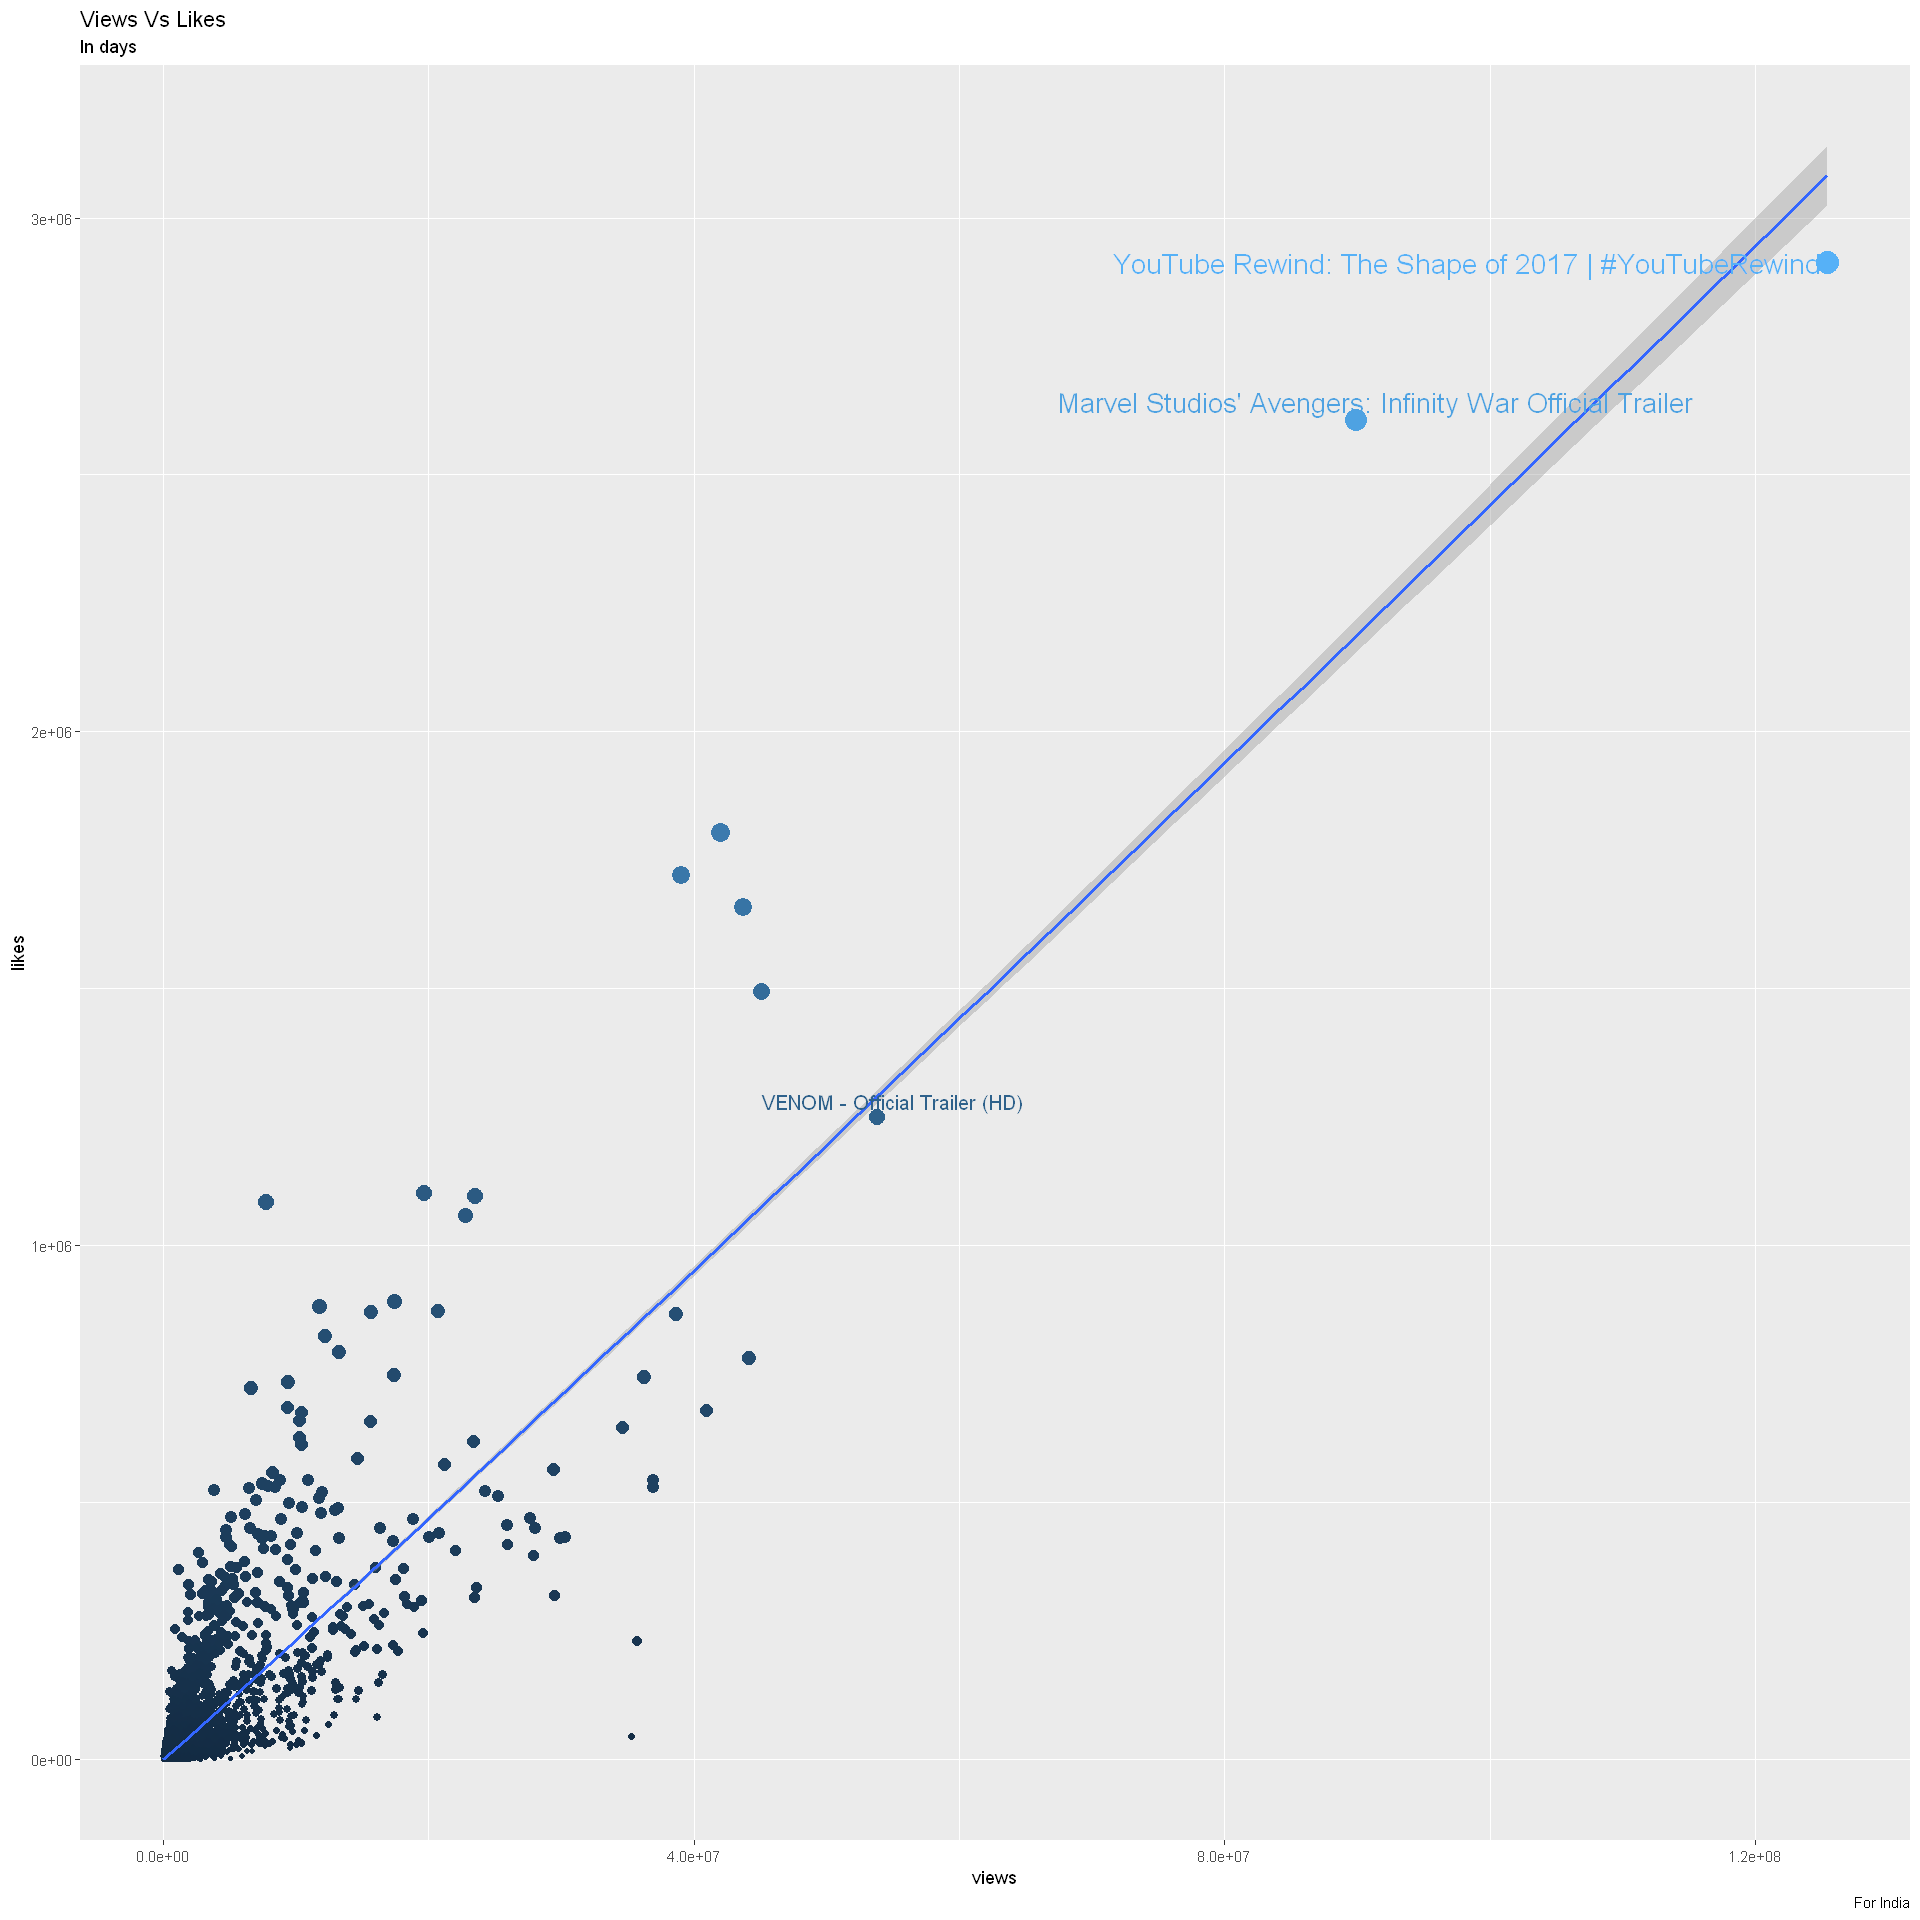

In [12]:
#exists("df_all[dif_days,]")


##Views vs Likes
ggplot(df_in[,.("views"=max(views),"likes"=max(likes)),by=title],aes(views,likes,colour=likes,size=likes))+geom_jitter()+geom_smooth()+guides(fill="none")+labs(caption="For India",title="Views Vs Likes",subtitle="In days")+theme(legend.position = "none")+geom_text_repel(data=subset(df_in[,.("views"=max(views),"likes"=max(likes)),by=title], views > 5e+07),aes(views,likes,label=title),check_overlap=T)

In [13]:
ggplot(df_all[,.("views"=max(views),"likes"=max(likes)),by=title],aes(views,likes,colour=likes,size=likes))+geom_jitter()+geom_smooth()+guides(fill="none")+labs(caption="For countries",title="Views Vs Likes",subtitle="In days")+theme(legend.position = "none")+geom_text_repel(data=subset(df_all[,.("views"=max(views),"likes"=max(likes)),by=title], views > 5e+07),aes(views,likes,label=title),check_overlap=T)

ERROR: Error in `[.data.frame`(df_all, , .(views = max(views), likes = max(likes)), : unused argument (by = title)


In [14]:
install.packages('RSentiment', repos='http://cran.us.r-project.org')

package 'RSentiment' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANIKET\AppData\Local\Temp\RtmpU7K5AH\downloaded_packages


In [15]:
library(RSentiment)
corpus = Corpus(VectorSource(list(sample(df_in$description,size=2000))))

corpus = tm_map(corpus, removePunctuation)

corpus = tm_map(corpus, content_transformer(tolower))

corpus = tm_map(corpus, removeNumbers) 

corpus = tm_map(corpus, stripWhitespace)

corpus = tm_map(corpus, removeWords, stopwords('english'))



dtm_eap = DocumentTermMatrix(VCorpus(VectorSource(corpus[[1]]$content)))

freq_eap <- colSums(as.matrix(dtm_eap))

sentiments_eap = calculate_sentiment(names(freq_eap))


 sentiments <- as.data.table(sentiments_eap)

 sentiments1 <- sentiments[,.N,by=.(sentiment)]

 sentiments1[,"Total":=sum(N)]

 sentiments1 <- sentiments1[,.("Percentage"=100*N/Total),by=.(sentiment)]

Warning message:
"package 'RSentiment' was built under R version 3.6.3"Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
"transformation drops documents"

[1] "Processing sentence: aarvind"
[1] "Processing sentence: amusic"
[1] "Processing sentence: apresentnspouses"
[1] "Processing sentence: aanjani"
[1] "Processing sentence: abodyguardat"
[1] "Processing sentence: acreative"
[1] "Processing sentence: akalyanam"
[1] "Processing sentence: amind"
[1] "Processing sentence: amr"
[1] "Processing sentence: aneethanaeat"
[1] "Processing sentence: apriya"
[1] "Processing sentence: asakka"
[1] "Processing sentence: asandakozhi"
[1] "Processing sentence: astuntat"
[1] "Processing sentence: athalapathyat"
[1] "Processing sentence: athought"
[1] "Processing sentence: aubaubbfubafubcubbubcd"
[1] "Processing sentence: aubcubeubeubeububeububfat"
[1] "Processing sentence: aucuceucucfuc"
[1] "Processing sentence: audaanat"
[1] "Processing sentence: auueuuu"
[1] "Processing sentence: auuuc"
[1] "Processing sentence: atll"
[1] "Processing sentence: atre"
[1] "Processing sentence: atve"
[1] "Processing sentence: aoaready"
[1] "Processing sentence: aoadulti

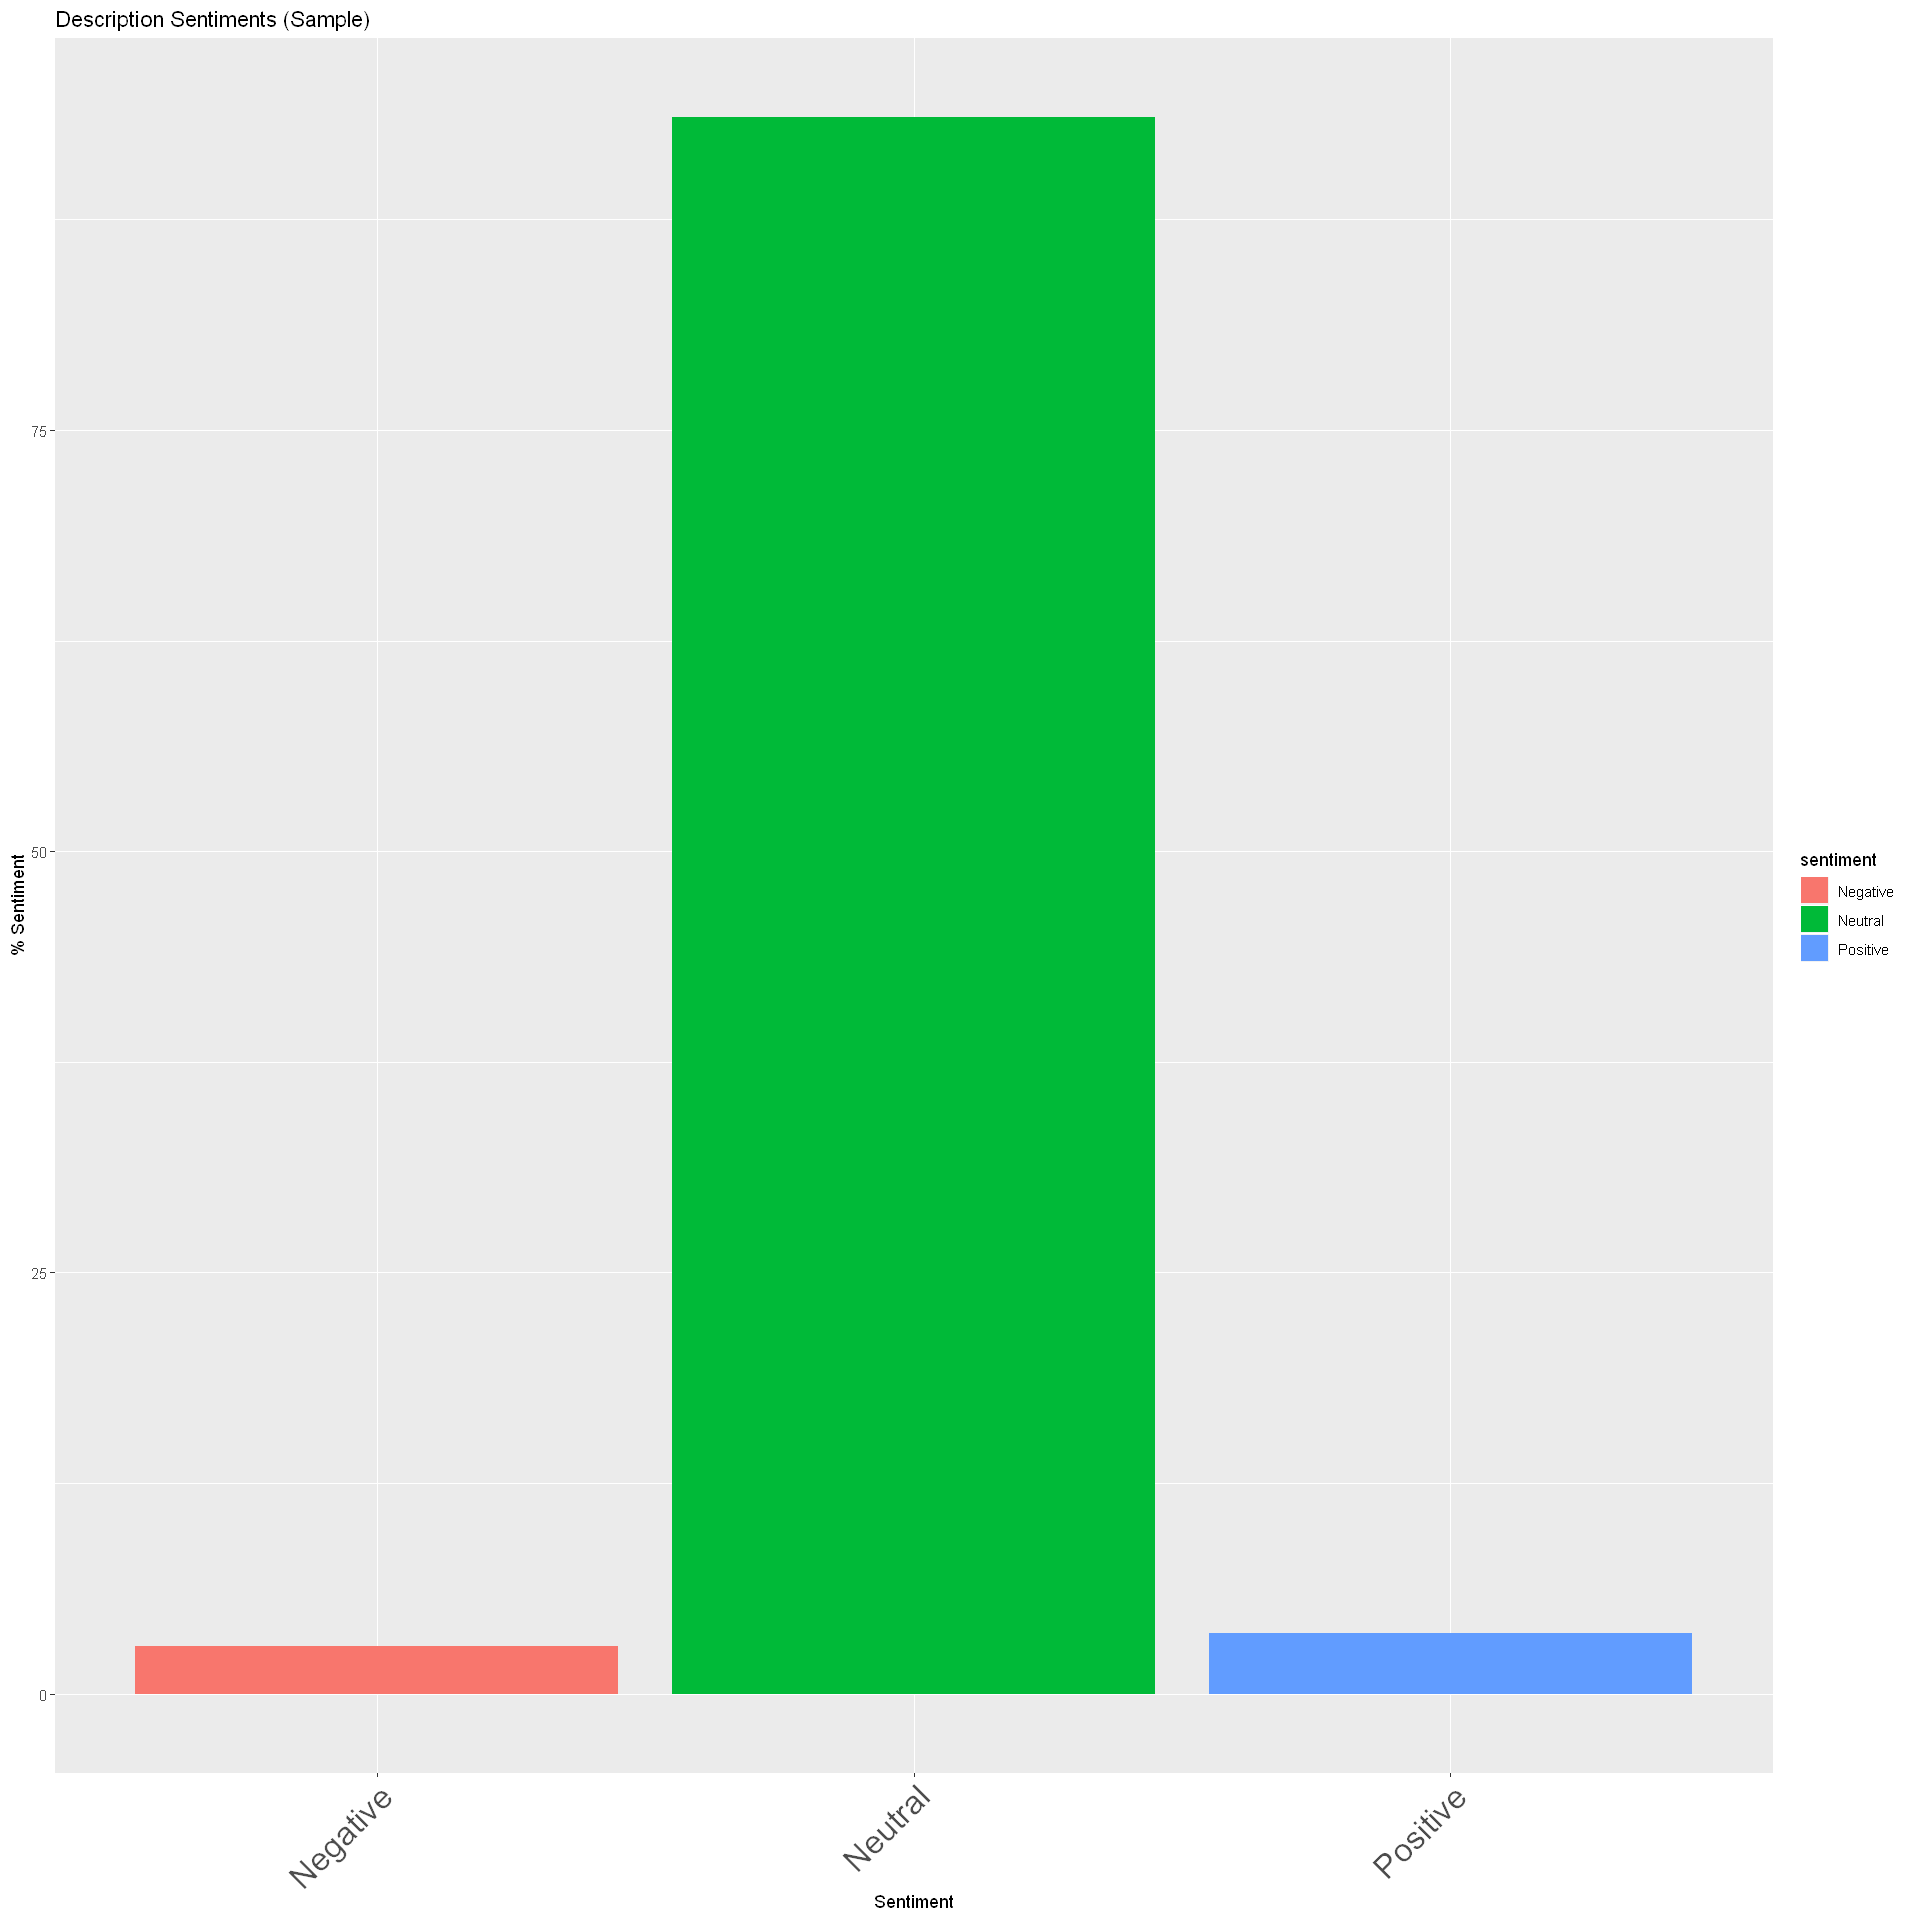

In [16]:

ggplot(sentiments1,aes(x = sentiment,y = Percentage ,fill=sentiment ))+
geom_bar(stat = "identity") +
ggtitle("Description Sentiments (Sample)")+xlab("Sentiment")+ylab("% Sentiment")+ 
theme(axis.text.x = element_text(angle = 45, size=20,hjust = 1))

Warning message:
"Each time `sentiment` is run it has to do sentence boundary disambiguation when a
raw `character` vector is passed to `text.var`. This may be costly of time and
memory.  It is highly recommended that the user first runs the raw `character`
vector through the `get_sentences` function."

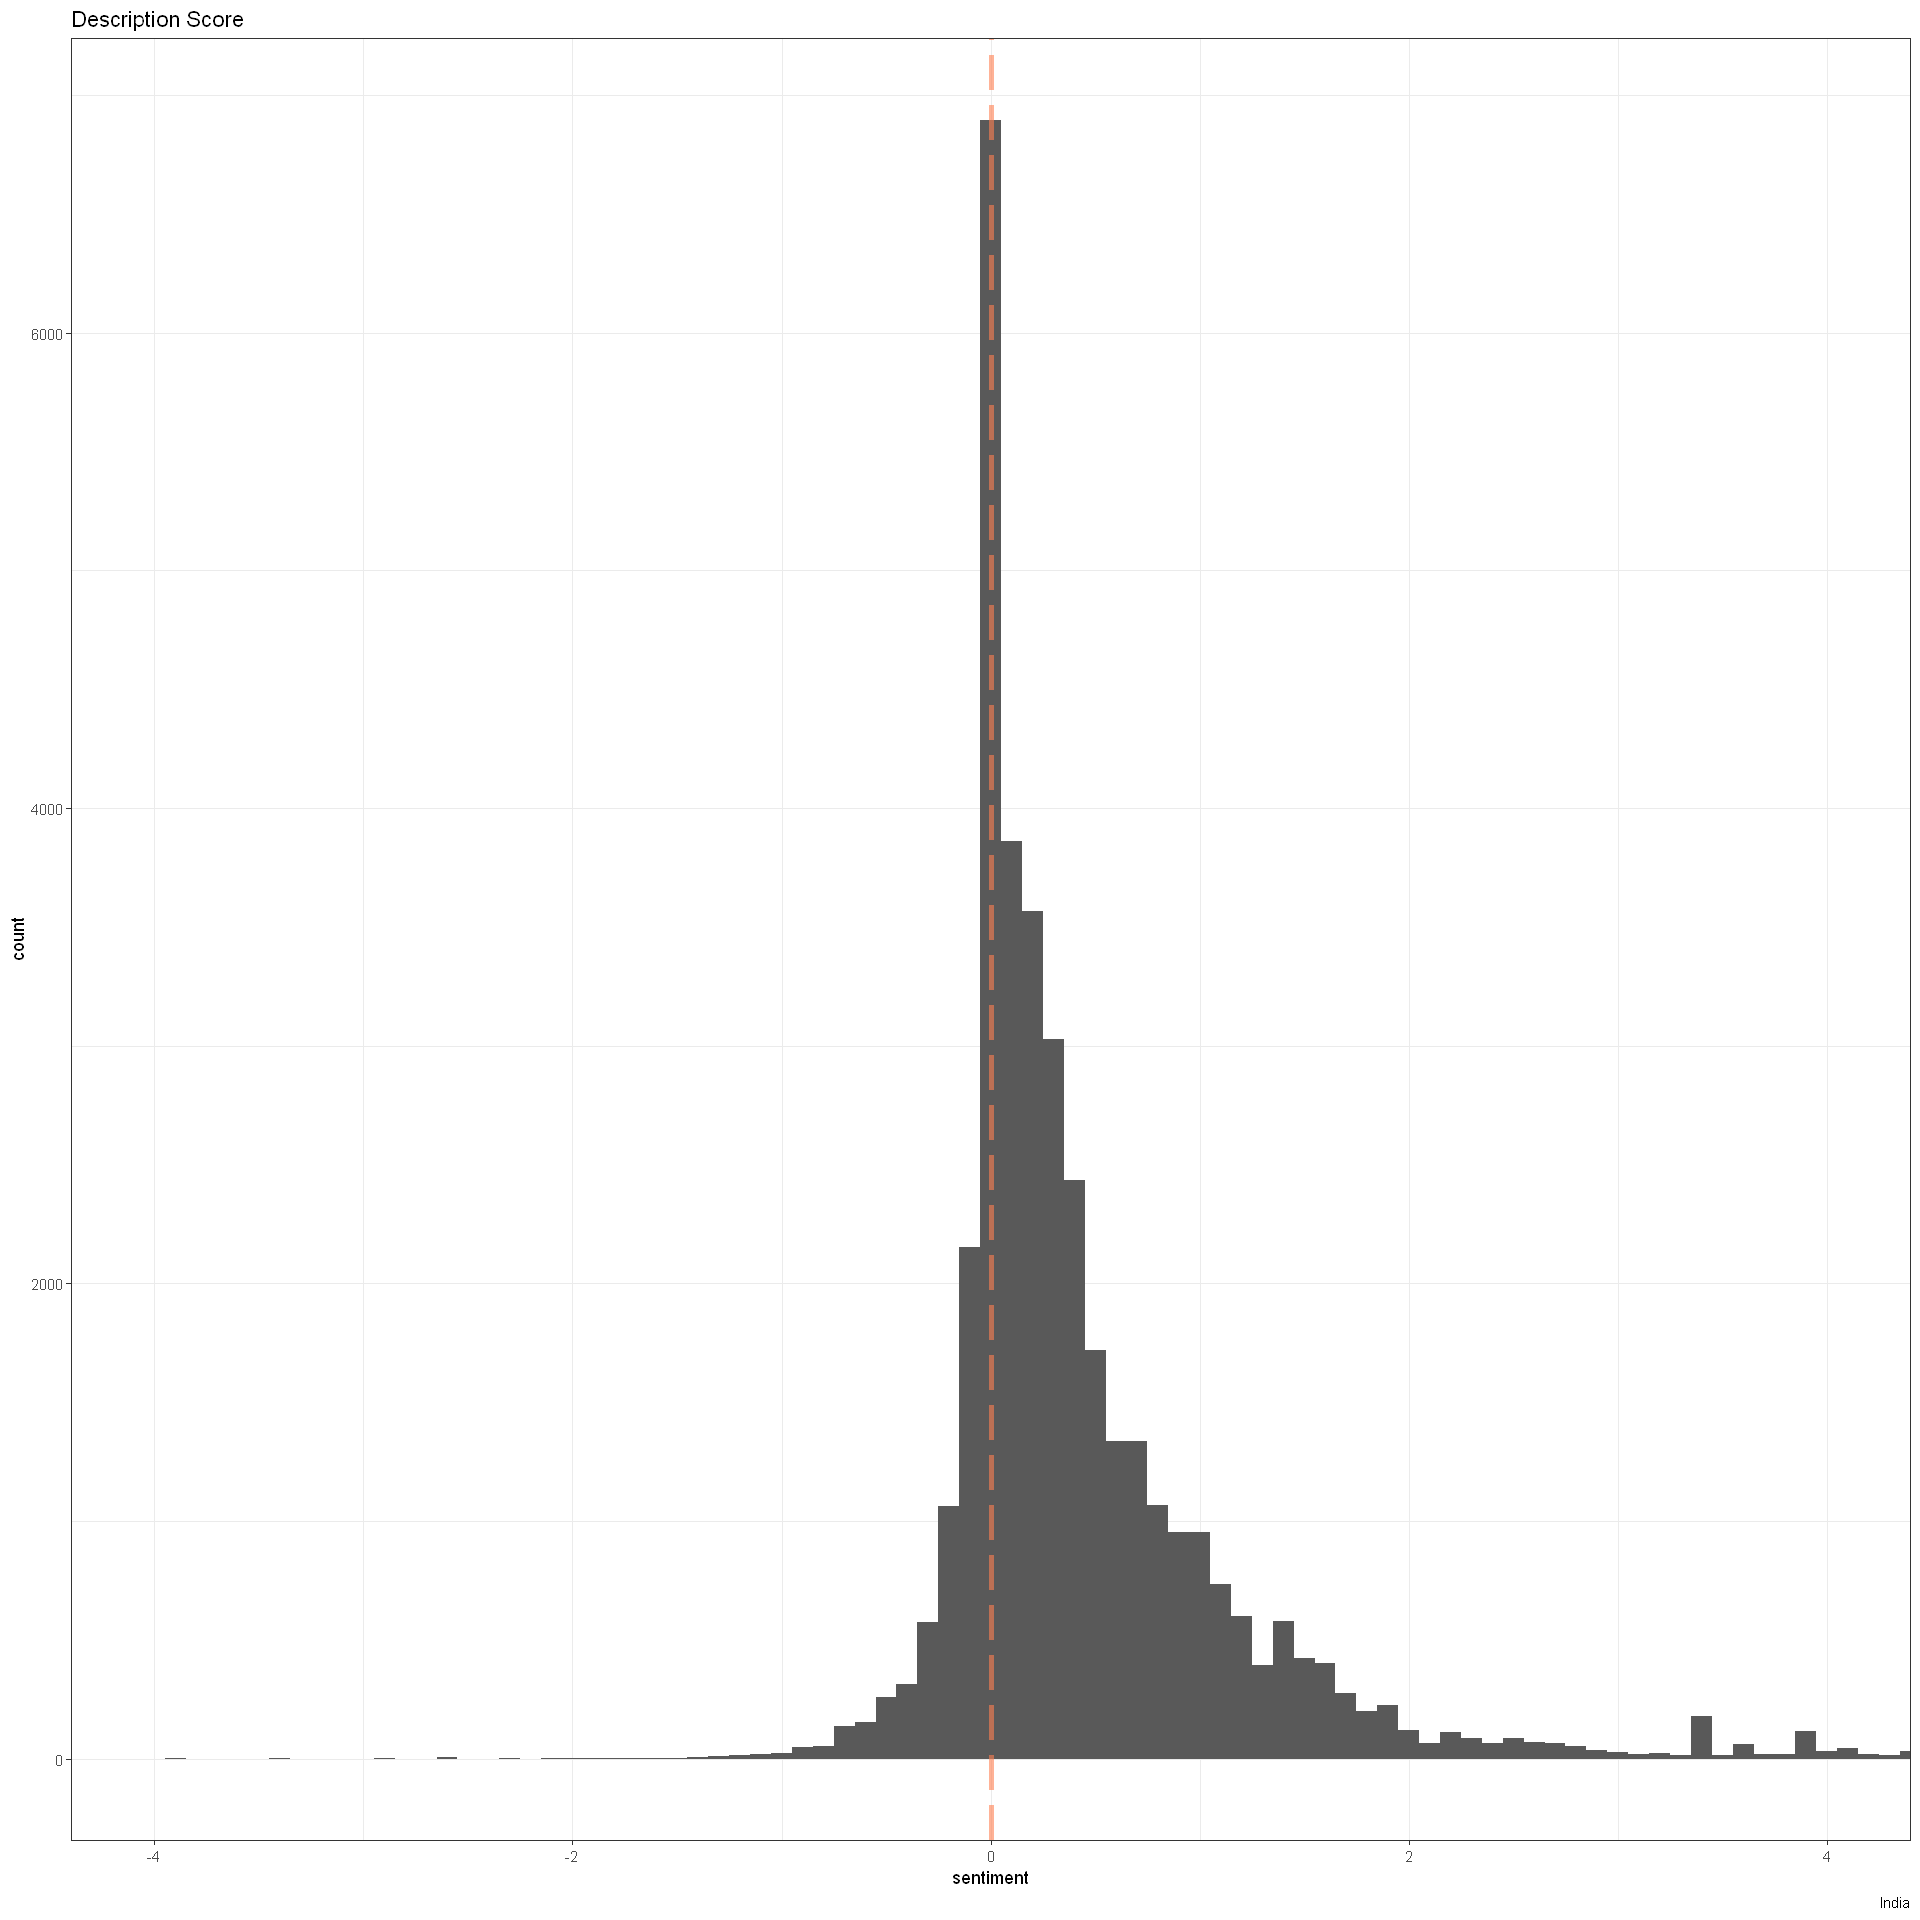

In [17]:
sents_eap <- sentiment(df_in$description)

sents_eap <- sents_eap[,.("word_count"=sum(word_count),"sentiment"=sum(sentiment)),by=element_id]

ggplot(data=sents_eap)+
geom_histogram(mapping = aes(x=sentiment),binwidth = .1)+
theme_bw()+scale_fill_brewer(palette = "Set1")+
geom_vline(xintercept = 0, color = "coral", size = 1.5, alpha = 0.6, linetype = "longdash") +
labs(title="Description Score",caption="India")+coord_cartesian(xlim = c(-4, 4))